# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

In [ ]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.24.3  seaborn==0.12.1 matplotlib==3.6.0  statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info pandas==1.5.3 empiricaldist==0.6.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12107 sha256=3c64d1dfcda4176b3f1f5a10833642e2bd060622f5

## Importar librerías

In [ ]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

Datos con información extra que no es necesaria para los posteriores analisis.

In [ ]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

#### Datos previamente procesados

In [ ]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de `seaborn`

In [ ]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [ ]:
from google.colab import drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.read_csv('/content/drive/MyDrive/EDA_curso/penguins_raw.csv')

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

In [ ]:
preprocess_penguins_df = pd.read_csv('/content/drive/MyDrive/EDA_curso/penguins.csv')
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
preprocess_penguins_df.shape


(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [ ]:
(
  preprocess_penguins_df
  .isnull()
  .melt()
)

variable  value
0     species  False
1     species  False
2     species  False
3     species  False
4     species  False
...       ...    ...
2747     year  False
2748     year  False
2749     year  False
2750     year  False
2751     year  False

[2752 rows x 2 columns]

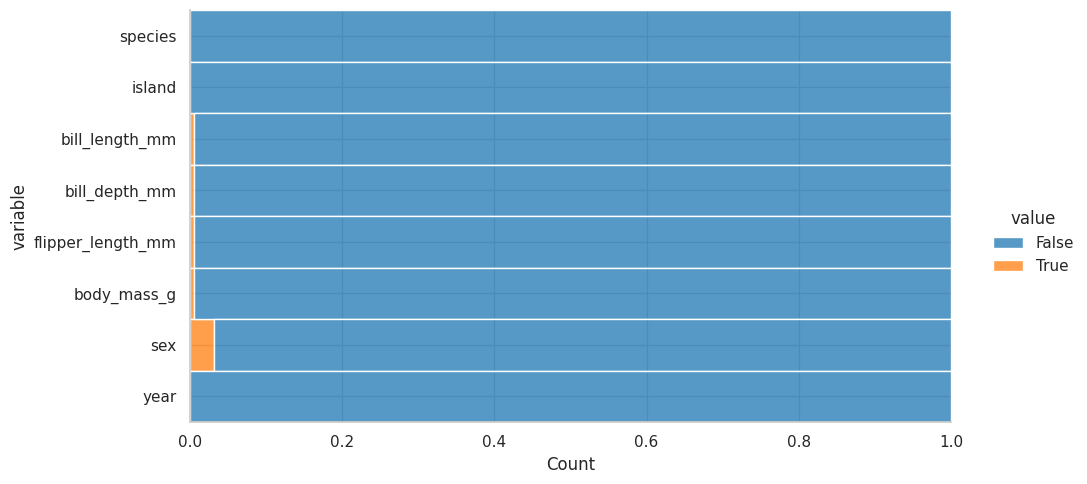

In [ ]:
(
  preprocess_penguins_df
  .isnull()
  .melt()
  .pipe(
      lambda df:(
       sns.displot(data = df,
       y='variable',
       hue= 'value',
       multiple = 'fill',
       aspect=2
       )
      )
  )
)
plt.show()

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

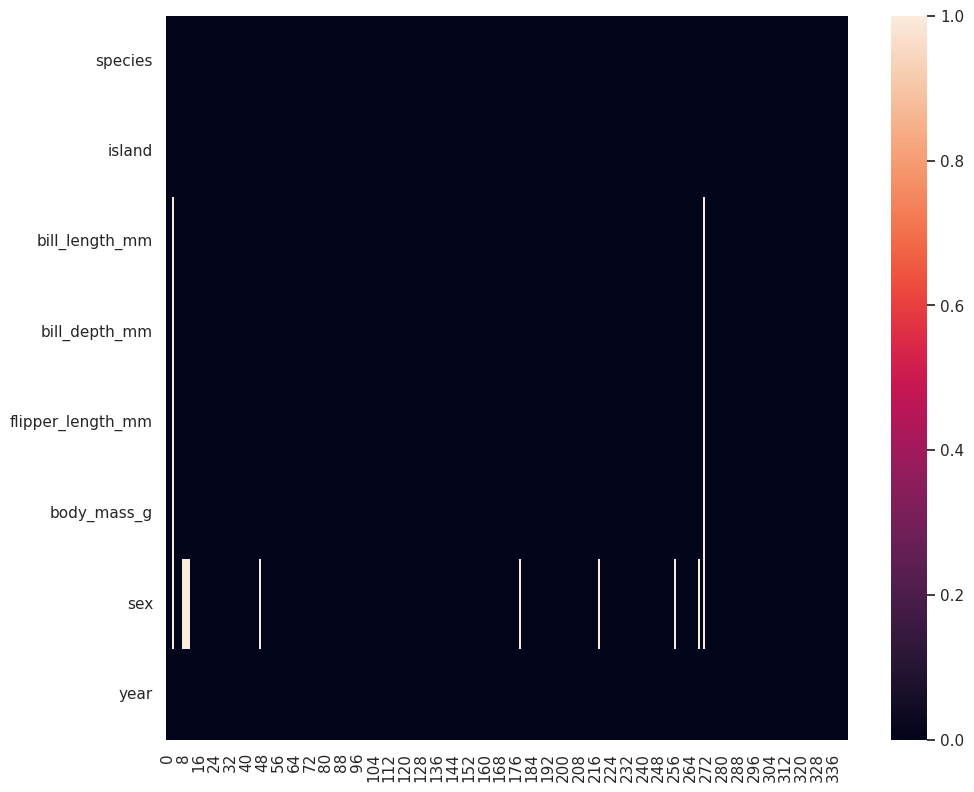

In [ ]:
(
  preprocess_penguins_df
  .isnull()
  .transpose()
  .pipe(
      lambda df:
      sns.heatmap(
          data = df
      )
  )
)
plt.show()

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [ ]:
processed_penguins_df= (
  preprocess_penguins_df
  .dropna()
)
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [ ]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [ ]:
processed_penguins_df.describe(include=(np.number))

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [ ]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [ ]:
#processed_penguins_df= (
    #processed_penguins_df
   # .astype({
     #   'species':'category',
      #  'island':'category',
     #   'sex':'category'
    }

    )
    
)

#processed_penguins_df.describe(include='category')




IndentationError: ignored

## ¿Cómo visualizar los conteos?

### Pandas

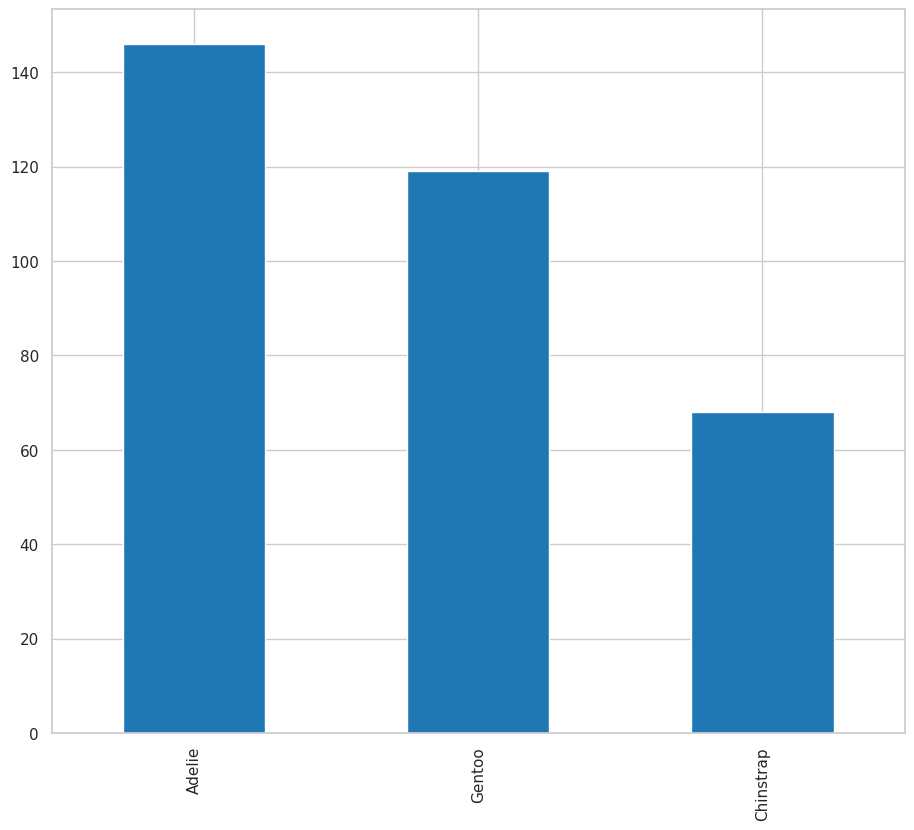

In [ ]:
(processed_penguins_df
.species
.value_counts()
.plot(
    kind='bar'
)
)
plt.show()

### Seaborn

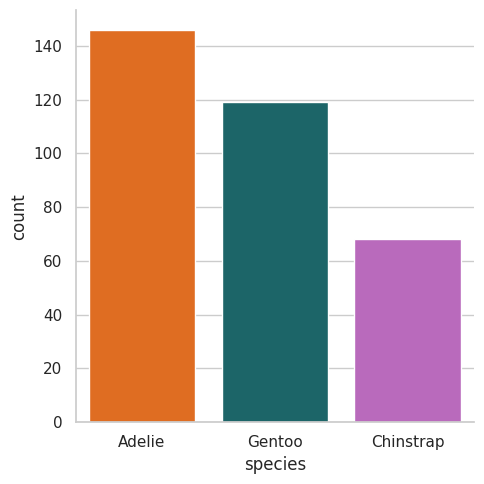

In [ ]:
sns.catplot(data = processed_penguins_df,x= 'species',kind = 'count',palette = penguin_color)
plt.show()


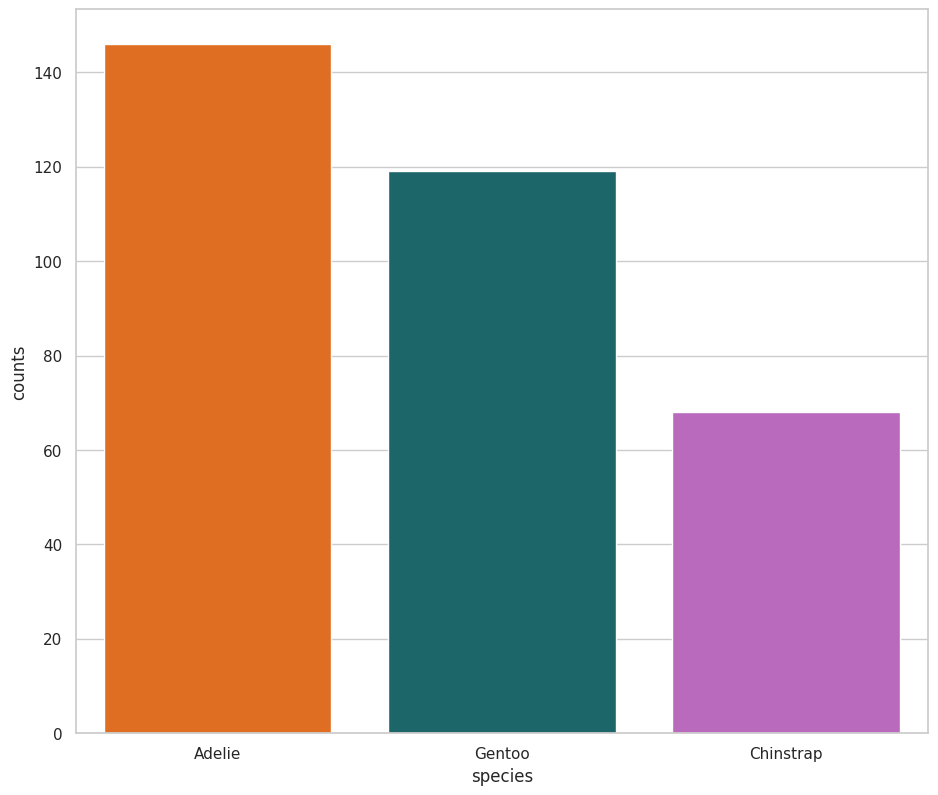

In [ ]:
(
    processed_penguins_df
    .value_counts('species',sort = True)
    .reset_index(name ='counts')
    .pipe(
        lambda df:(
            sns.barplot(
                data = df,
                x='species',
                y='counts',
                palette=penguin_color
            )
        )
        )
    )
plt.show()

### ¿Cómo visualizar las proporciones?

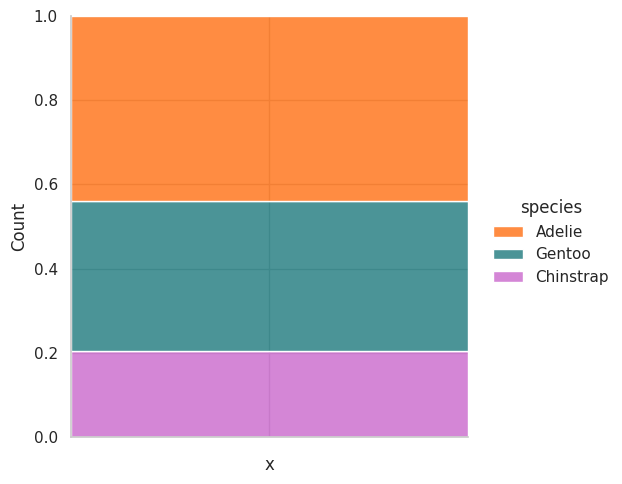

In [ ]:
(
    processed_penguins_df
    .add_column('x','')
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)
plt.show()

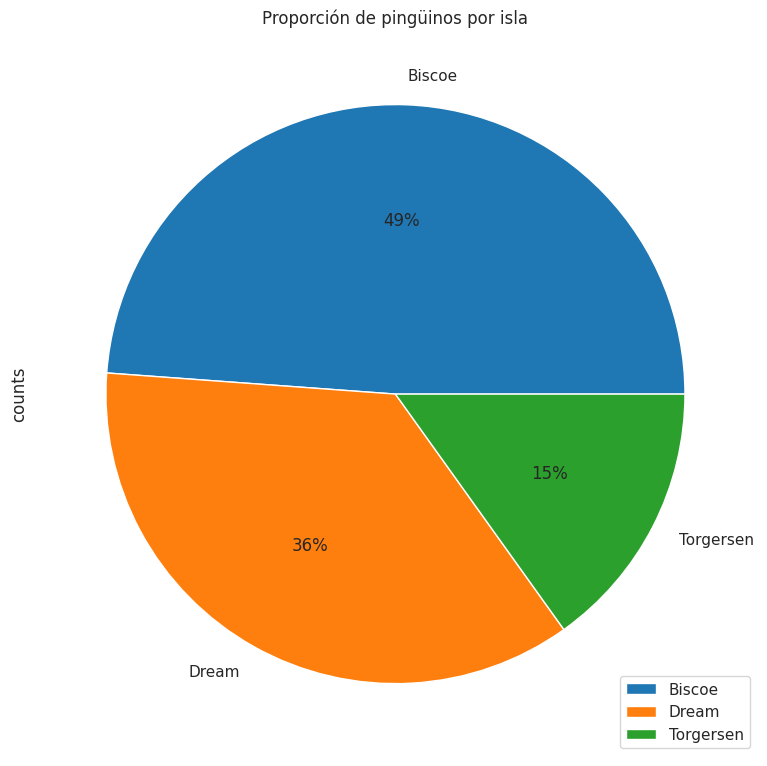

In [ ]:
(
    preprocess_penguins_df
    .value_counts('island')
    .reset_index(name='counts')
    .groupby(['island'])
    .sum()
    .plot(
        kind='pie',
        y='counts',
        autopct='%1.0f%%',
        title='Proporción de pingüinos por isla',
    )

)
plt.show()

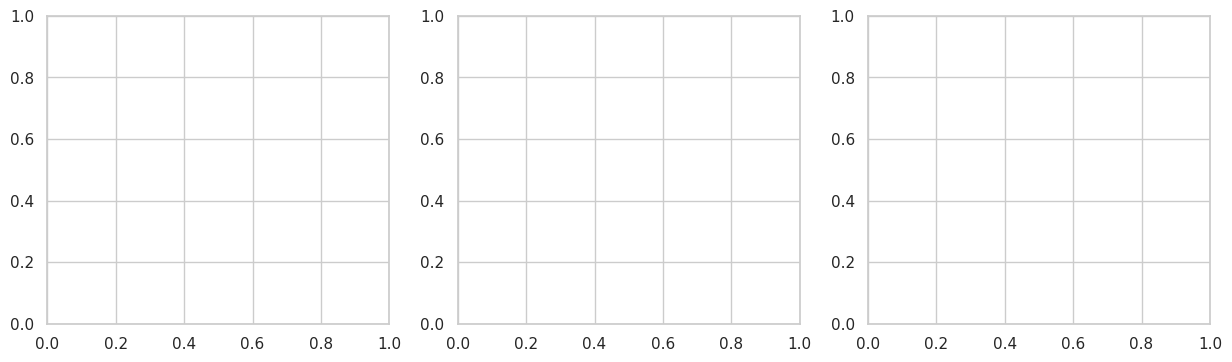

In [ ]:
# Usando iteraciones para tener los graficos de categorias

category_cols = processed_penguins_df.select_dtypes('category').columns

fig,ax = plt.subplots(1,3,figsize=(15,4))
for i in range (len(category_cols)):
    (
        processed_penguins_df
        .value_counts(category_cols[i],sort=False)
        .reset_index(name='count')
        .pipe(
            lambda df:(
                sns.barplot(
                    ax=ax[i],
                    data=df,
                    x=category_cols[i],
                    y='count'
                )
            )
        )
    )

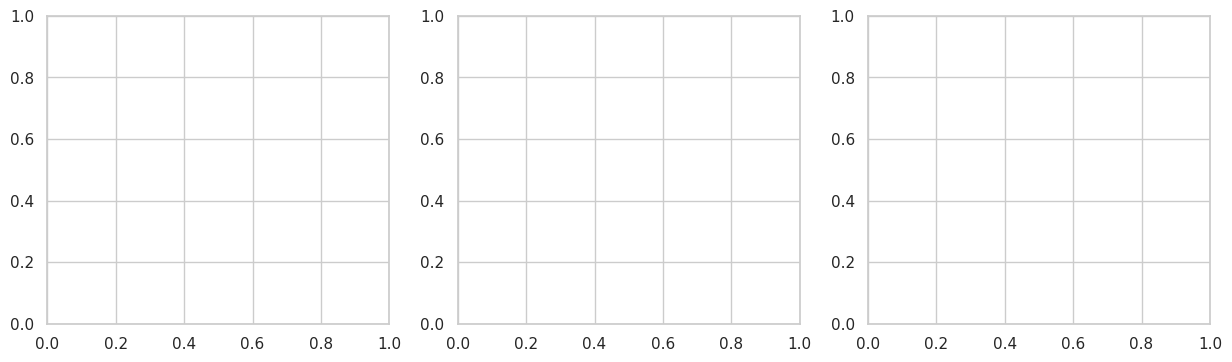

In [ ]:
# Usando iteraciones para tener los graficos de proporción en las categorías
fig,ax = plt.subplots(1,3,figsize=(15,4))
for i in range (len(category_cols)):
    (
        processed_penguins_df
        .add_column('x','')
        .pipe(
            lambda df:(
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x='x',
                    hue=category_cols[i],
                    multiple='fill'
                )
            )
        )
    )

# Medidas de tendencia central

## Media o promedio

In [ ]:
# Utilizando pandas y extrayendo la media de una sola variable
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [ ]:
# Utilizando numpy y extrayendo la media de una sola variable
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [ ]:
#Utilizando pandas y extrayendo la media de todas las variables numéricas
processed_penguins_df.mean()

<ipython-input-33-7a397e52ec2d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [ ]:
processed_penguins_df.median()

<ipython-input-34-deb08da4cd61>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [ ]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [ ]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [ ]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [ ]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [ ]:
processed_penguins_df.max(numeric_only=True)-processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [ ]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [ ]:
processed_penguins_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [ ]:
# Primer cuartil
Q1= processed_penguins_df.quantile(0.25, numeric_only=True)
Q1

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [ ]:
#Tercer cuartil
Q3= processed_penguins_df.quantile(0.75, numeric_only=True)
Q3

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [ ]:
#Rango intercuartilico (IQR)
IQR = Q3-Q1
IQR

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [ ]:
(
    processed_penguins_df
    .quantile(q=[0.25,0.50,0.75],numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df:(df[0.75]-df[0.25])
       )
)

variable    0.25     0.5    0.75     iqr
0     bill_length_mm    39.5    44.5    48.6     9.1
1      bill_depth_mm    15.6    17.3    18.7     3.1
2  flipper_length_mm   190.0   197.0   213.0    23.0
3        body_mass_g  3550.0  4050.0  4775.0  1225.0
4               year  2007.0  2008.0  2009.0     2.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

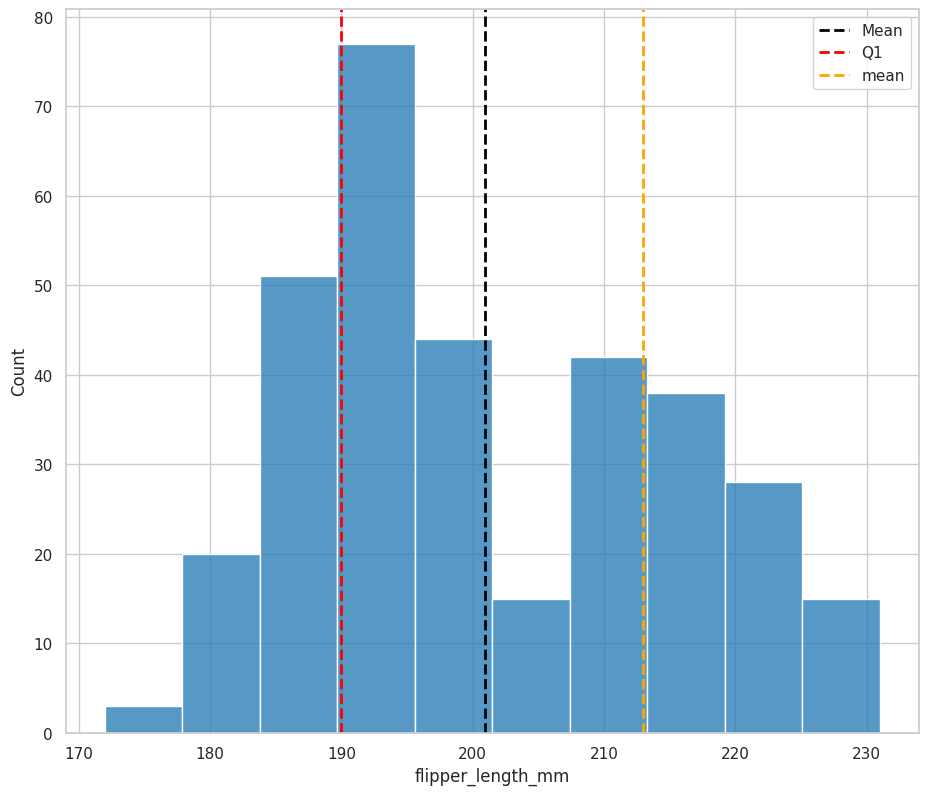

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    label='Mean',
    color= 'black',
    linestyle='dashed',
    linewidth=2
  
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    label='Q1',
    color= 'red',
    linestyle='dashed',
    linewidth=2 
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    label='mean',
    color= 'orange',
    linestyle='dashed',
    linewidth=2
)
plt.legend()
plt.show()

### Diagrama de caja / boxplot

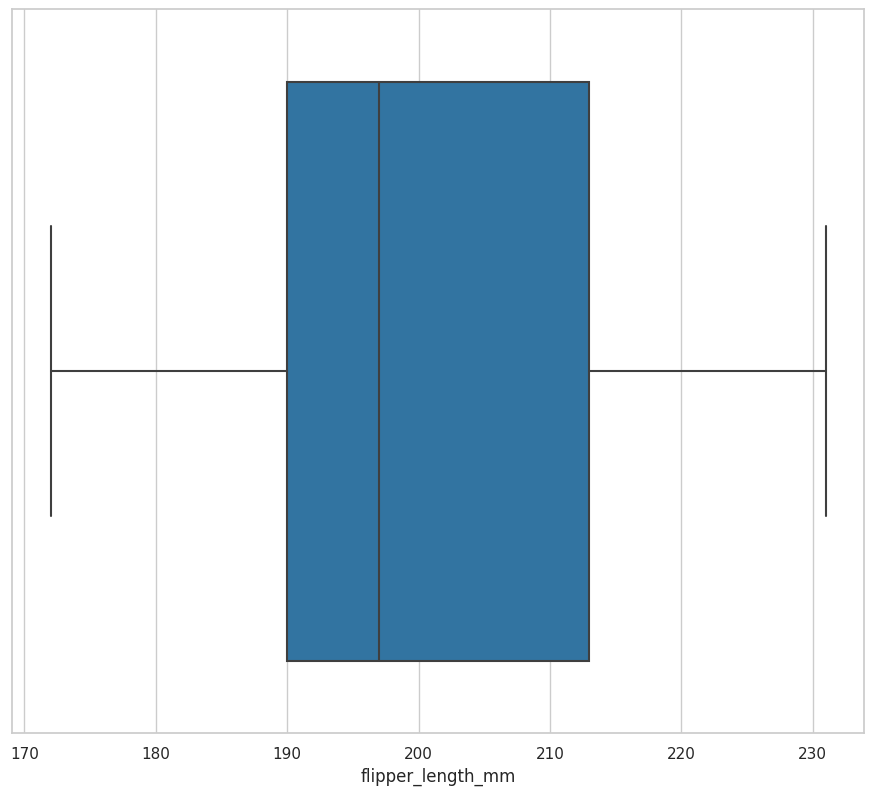

In [ ]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.show()

### Limitaciones

In [ ]:
def freedman_diaconis_bindwidth (x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

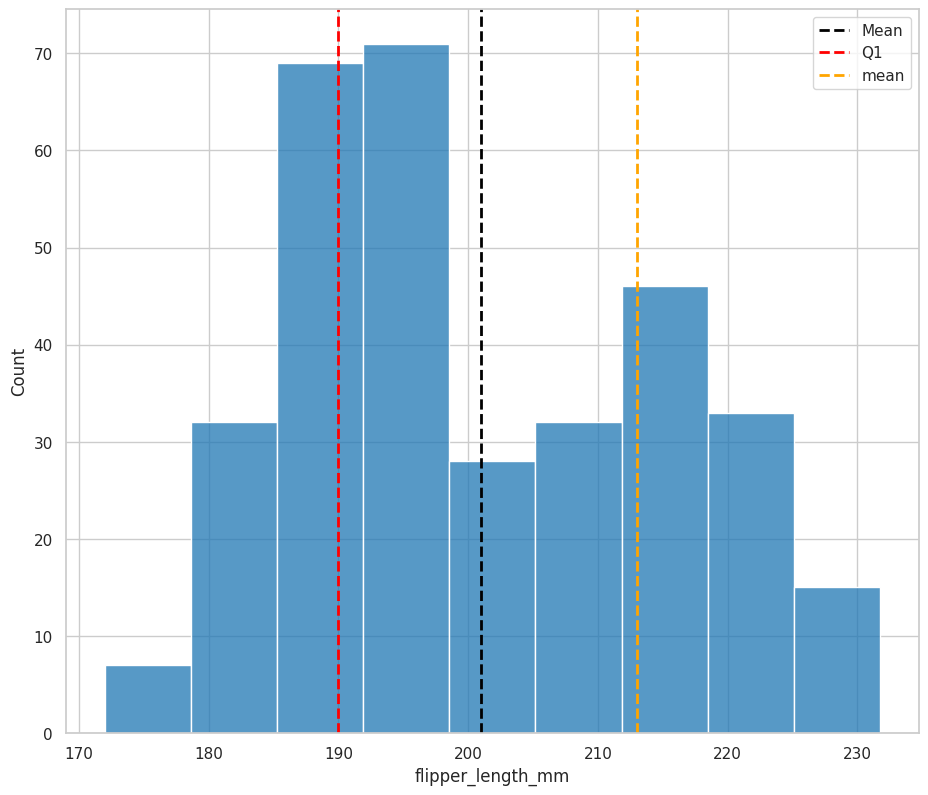

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=freedman_diaconis_bindwidth(processed_penguins_df.flipper_length_mm)
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    label='Mean',
    color= 'black',
    linestyle='dashed',
    linewidth=2
  
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    label='Q1',
    color= 'red',
    linestyle='dashed',
    linewidth=2 
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    label='mean',
    color= 'orange',
    linestyle='dashed',
    linewidth=2
)
plt.legend()
plt.show()

In [ ]:
numeric_columns = processed_penguins_df.select_dtypes(include=(np.number)).columns
numeric_columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')

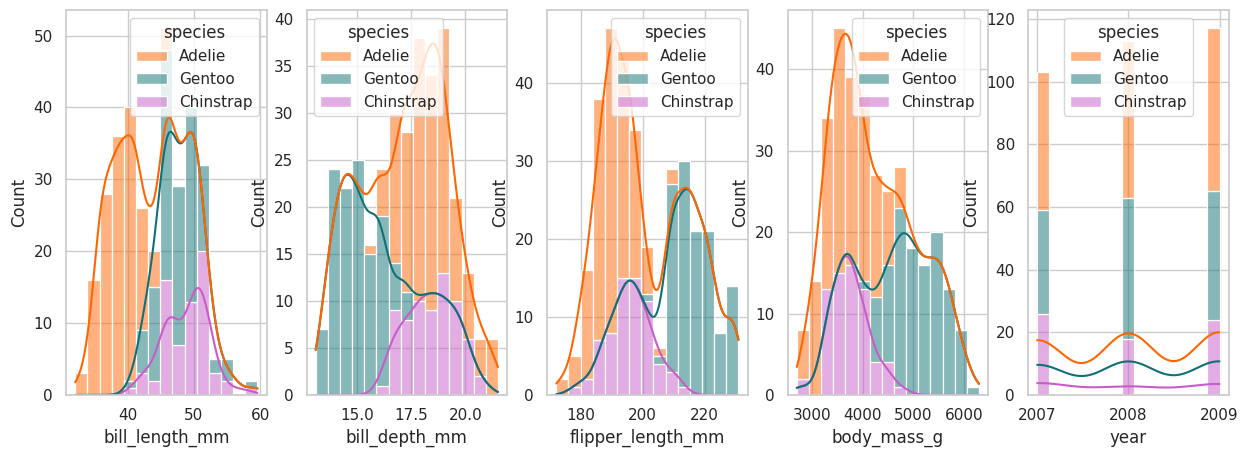

In [ ]:
fig,ax = plt.subplots(1,len(numeric_columns), figsize=(15,5))

for i in range(len(numeric_columns)):
    sns.histplot( 
        ax=ax[i],
        data=processed_penguins_df,
        x=numeric_columns[i],
        multiple='stack',
        hue='species',
        bins=15,
        palette=penguin_color,
        kde=True,
        )

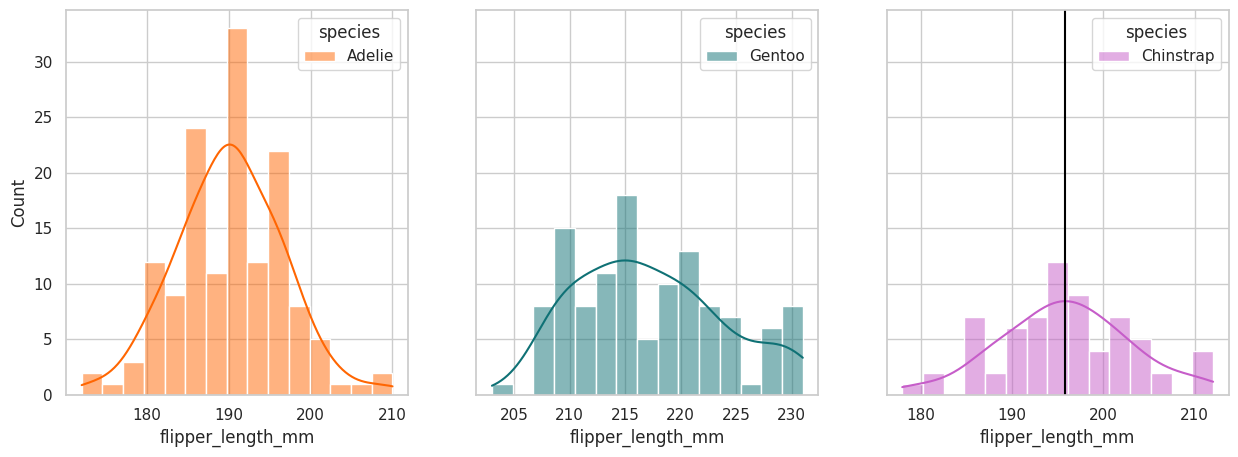

In [ ]:
# Codigo para visualizar la distribución de una variable en cada especie
species = processed_penguins_df.species.unique()

adelie_df = processed_penguins_df.query("species == 'Adelie'")
gentoo_df = processed_penguins_df.query("species == 'Gentoo'")
chinstrap_df = processed_penguins_df.query("species == 'Chinstrap'")

list= [adelie_df,gentoo_df,chinstrap_df]
fig,ax = plt.subplots(1,len(list), figsize=(15,5), sharey=True)

for i in range(len(list)):
    sns.histplot( 
        ax=ax[i],
        data=list[i],
        x='flipper_length_mm',
        multiple='layer',
        hue='species',
        bins=15,
        kde=True,
        palette=penguin_color,
        )
ax[i].axvline(
        x=list[i].flipper_length_mm.mean(),
        color='black'
        )
plt.show()

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

Se utiliza para valores discretos

### Utilizando `seaborn`

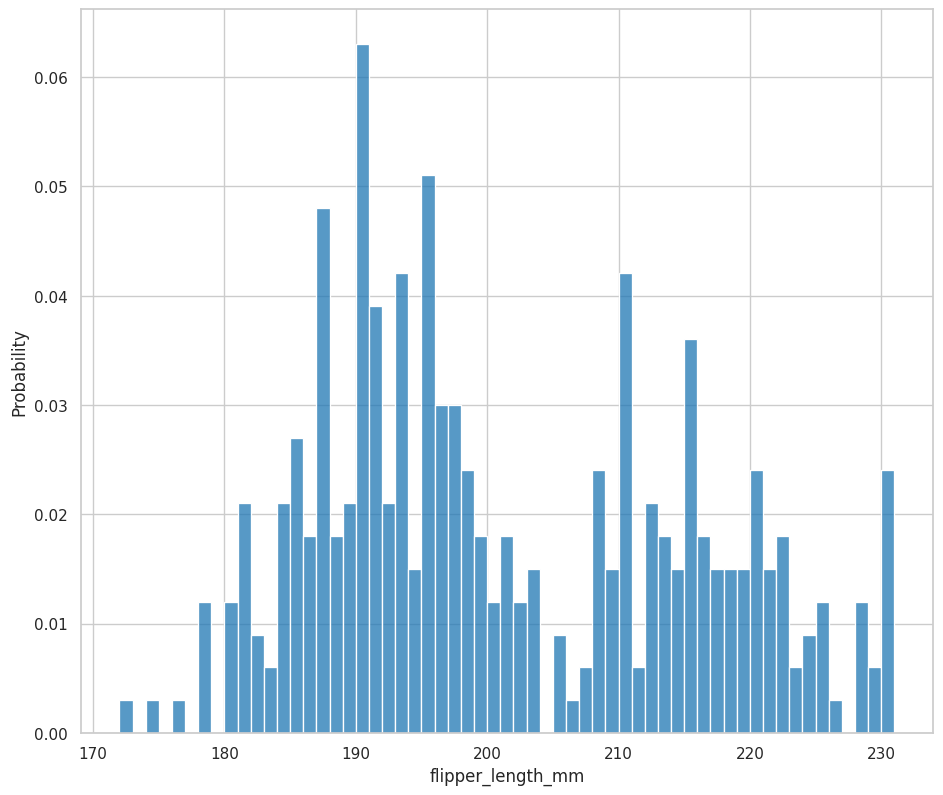

In [ ]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)
plt.show()

### Utilizando `empiricaldist`

In [ ]:
pmf_flipper_length_mm=empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

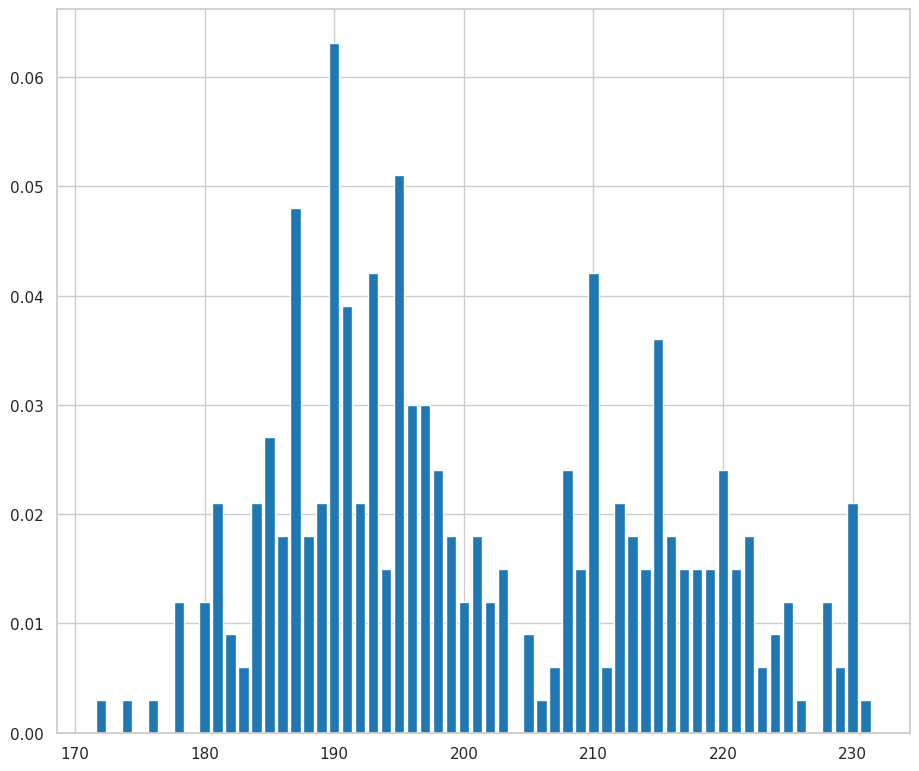

In [ ]:
#Metodo de graficación con empiricaldist
pmf_flipper_length_mm.bar()

In [ ]:
# Probabilidad de que un pingüino tenga un tamaño de a la de 190 mm
pmf_flipper_length_mm(190)


0.06306306306306306

In [ ]:
# Este valor no se puede visualizar en seaborn
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

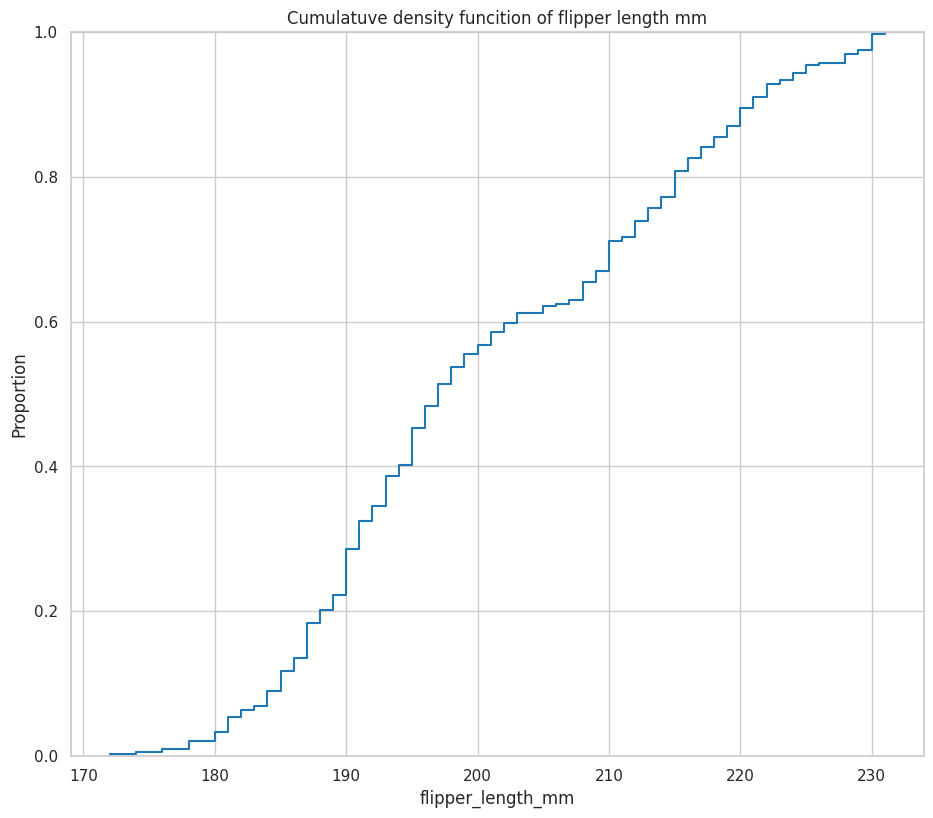

In [ ]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)
plt.title('Cumulatuve density funcition of flipper length mm')
plt.show()


### Utilizando `empiricaldist`

In [ ]:
cdf_flipper_length_mm=empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

La probabilidad de tener un pingüino con un tamaño de ala de 200 mm es de 0.5675675675675675


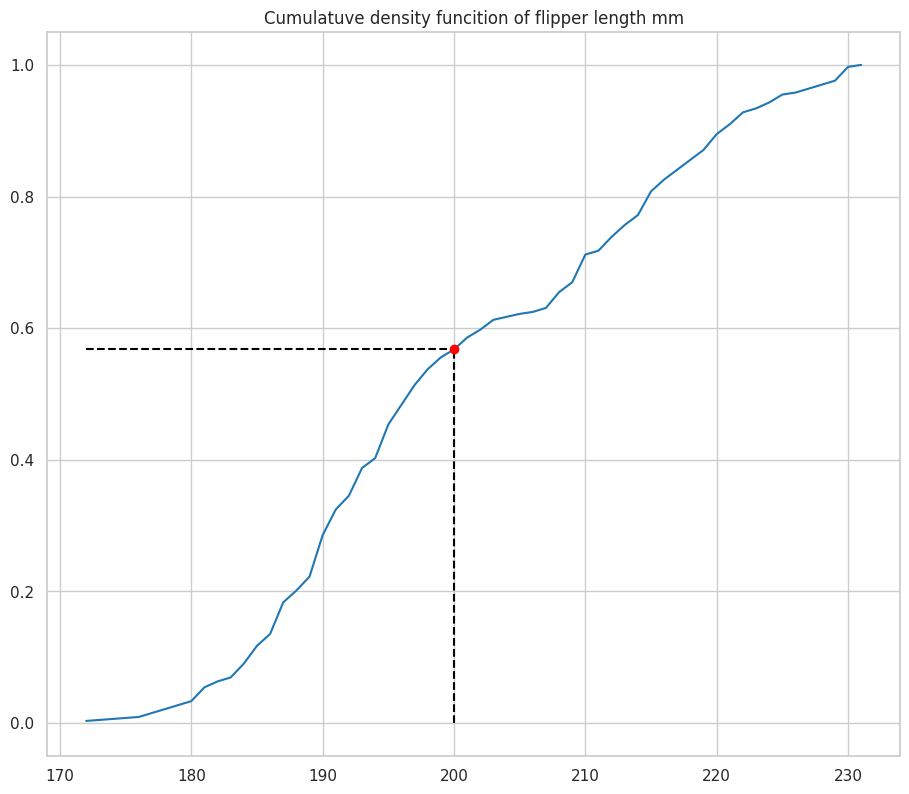

In [ ]:
cdf_flipper_length_mm.plot()
q=200
p= cdf_flipper_length_mm.forward(q)
print(f'La probabilidad de tener un pingüino con un tamaño de ala de {q} mm es de {p}')
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)
plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)
plt.plot(q,p,'ro')
plt.title('Cumulatuve density funcition of flipper length mm')
plt.show()

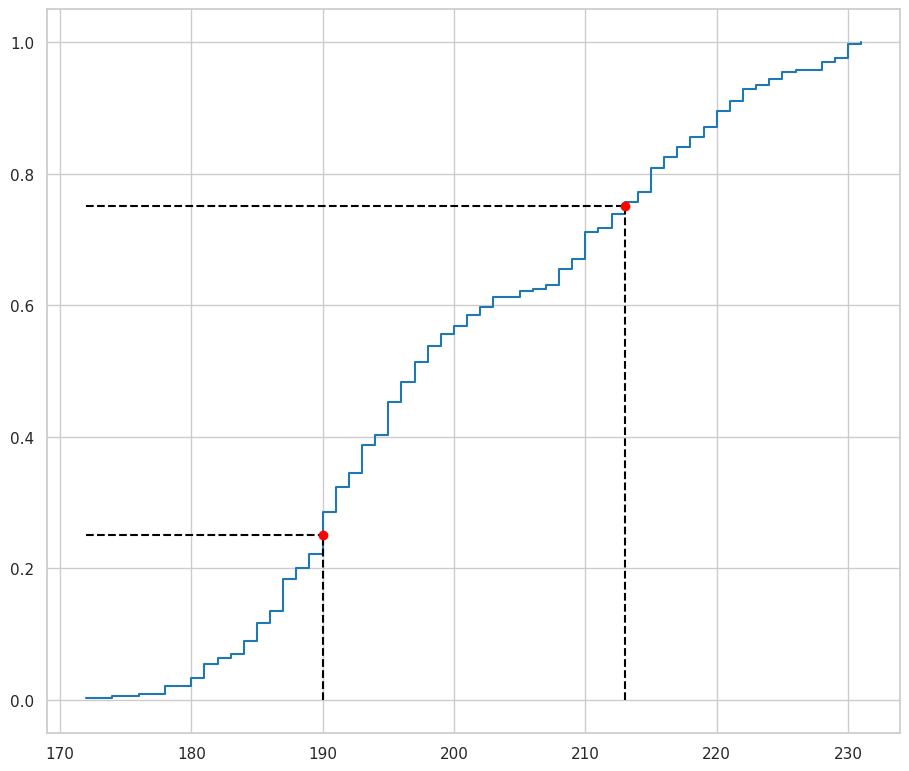

In [ ]:
cdf_flipper_length_mm.step()
p_1=0.25 #probabilidad primer cuartil
p_2=0.75 #probabilidad tercer cuartil
ps=(0.25,0.75)
qs=cdf_flipper_length_mm.inverse(ps) #Con inverse obtenemos los valores que equivalen al 0.27 y 0.75 de los datos acumulados
plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)
plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)
plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)
plt.show()

In [ ]:
pmf_flipper_length_mm.qs


array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 228., 229., 230., 231.])

### Comparando distribuciones

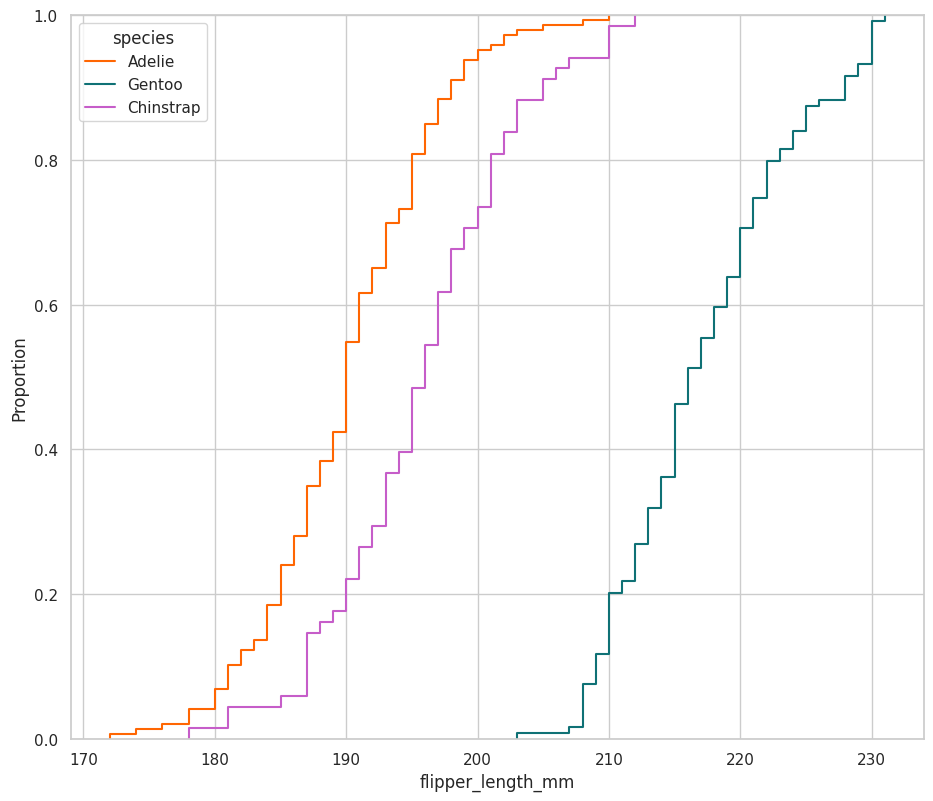

In [ ]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

## Funciones de densidad de probabilidad

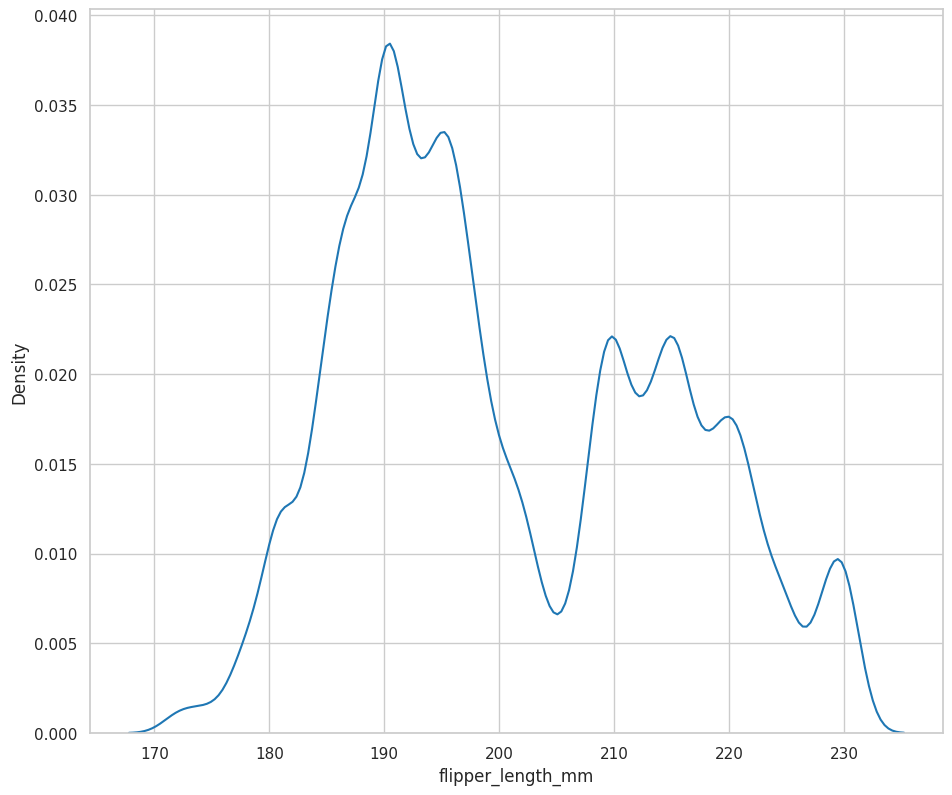

In [ ]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1 #Ajusta los bins o cantidad de muestras a graficarr
)
plt.show()

In [ ]:
stats= processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

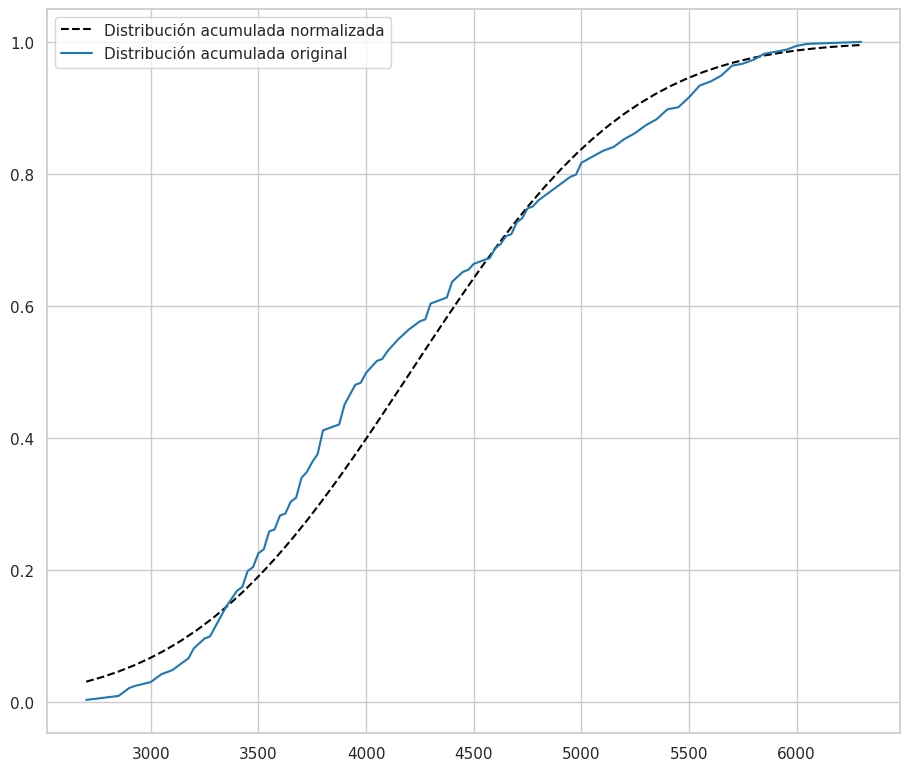

In [ ]:
# Se crea un vector con los valores de la variable body_mass_g
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
plt.plot(xs,
         ys,
         color='black',
         linestyle='dashed',
         label='Distribución acumulada normalizada')
empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot(
    label='Distribución acumulada original'
)
plt.legend()
plt.show()

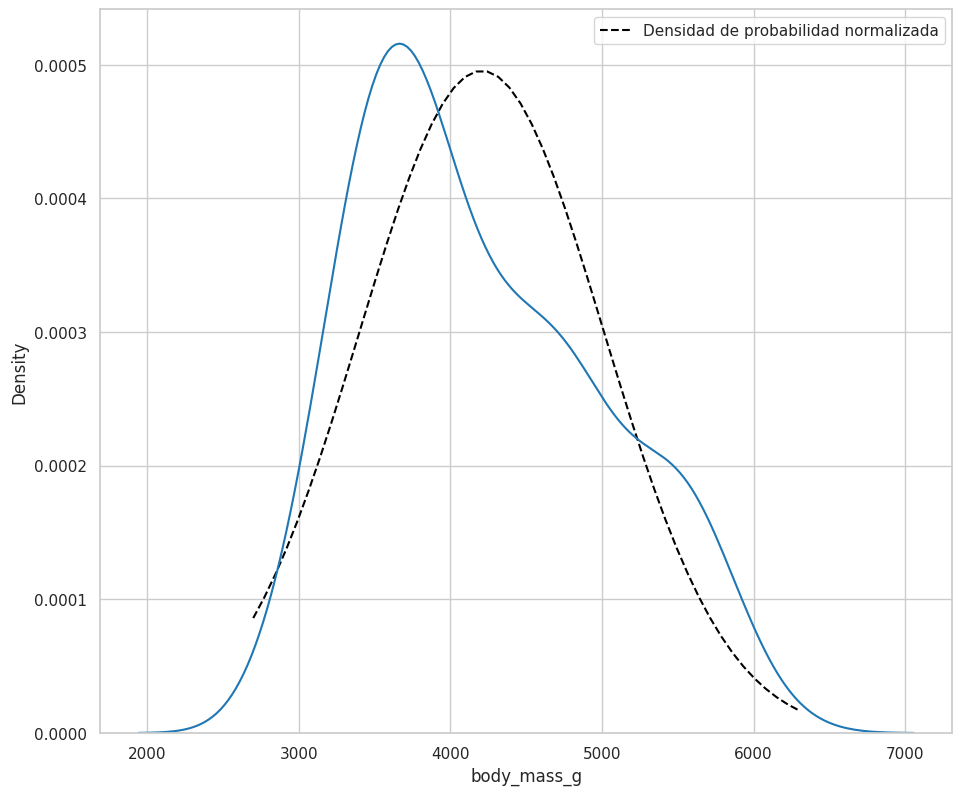

In [ ]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
plt.plot(xs,
         ys,
         color='black',
         linestyle='dashed',
         label='Densidad de probabilidad normalizada')
sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g',
)
plt.legend()
plt.show()

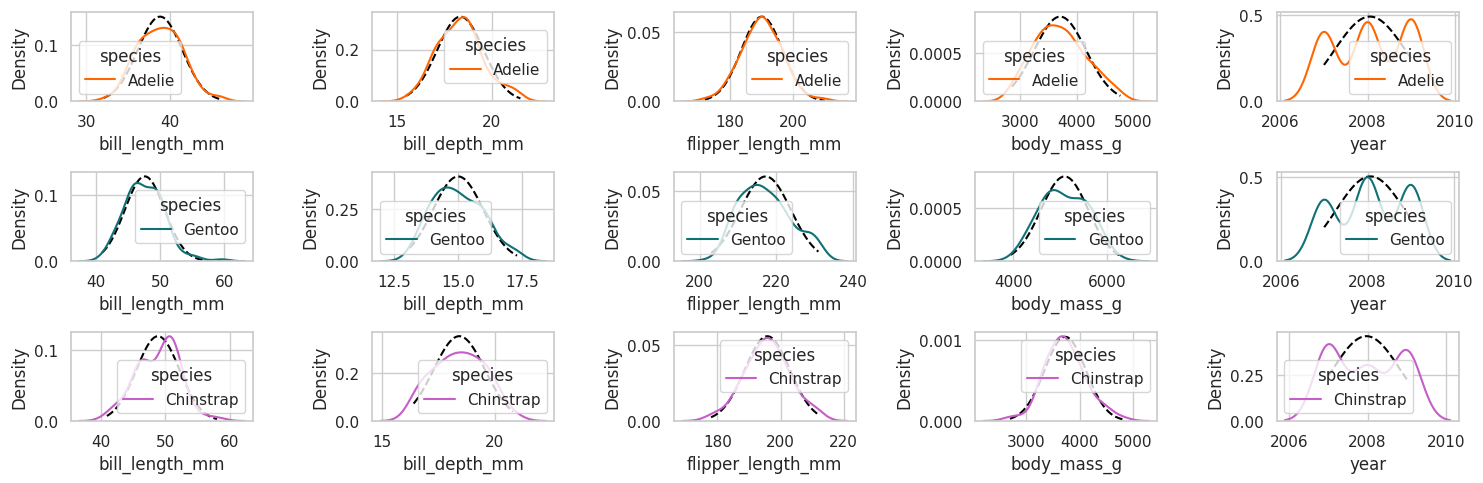

In [ ]:
fig,ax =plt.subplots(nrows=len(species), ncols=len(numeric_columns),figsize=(15,5))

for i,i_col in enumerate(list):
 for j,j_col in enumerate(numeric_columns):
  stat=i_col[j_col].describe()
  xsi = np.linspace(stat['min'],stat['max'])
  ysi = scipy.stats.norm(stat['mean'],stat['std']).pdf(xsi)

  ax[i][j].plot(xsi,
                ysi,
                color='black',
                linestyle='--')
  sns.kdeplot(
      ax=ax[i][j],
      data=i_col,
      x=j_col,
      hue='species',
      palette=penguin_color
      
  )
  fig.tight_layout()





# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

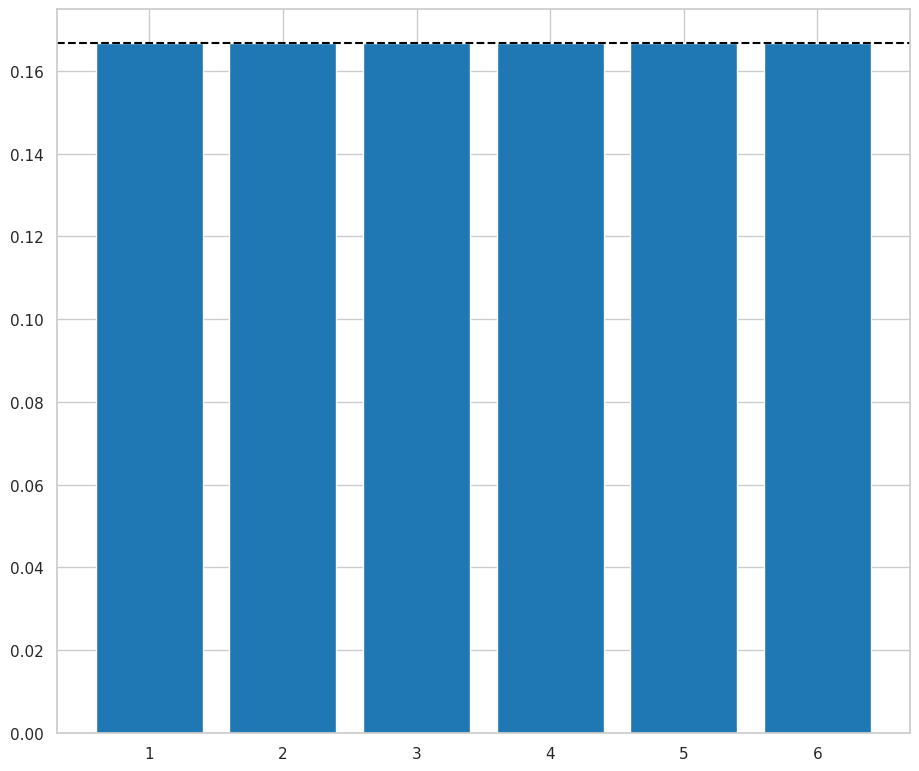

In [ ]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()
plt.axhline(y=1/6,
            color='black',
            linestyle='dashed')
plt.show()

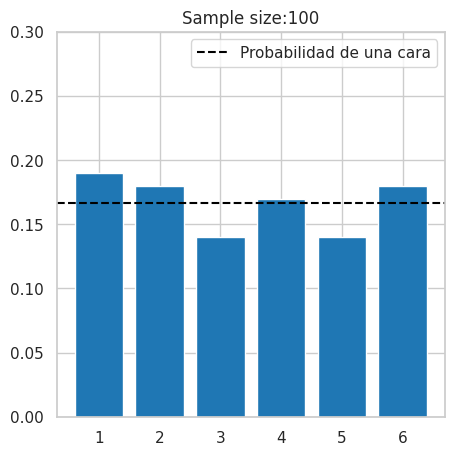

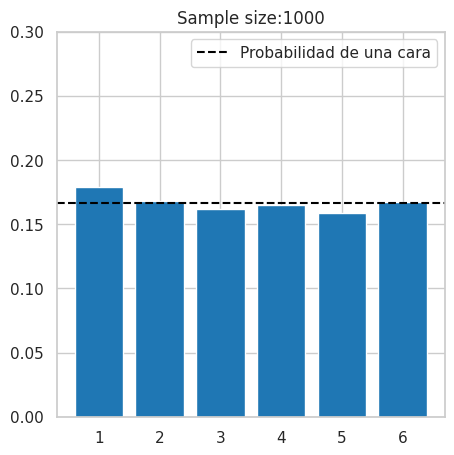

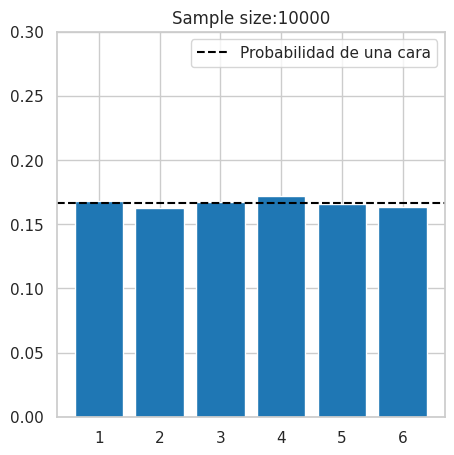

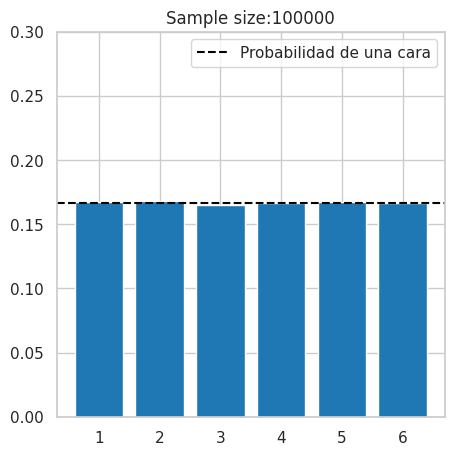

In [ ]:
for sample_size in (1e2,1e3,1e4,1e5):
  sample_size=int(sample_size)
  values=dice.sample(sample_size)
  sample_pmf=empiricaldist.Pmf.from_seq(values)
  
  plt.figure(figsize=(5, 5))
  sample_pmf.bar()
  plt.axhline(y=1/6,
              color='black',
              linestyle='dashed', label='Probabilidad de una cara')
  plt.ylim([0,0.30])
  plt.title(f'Sample size:{sample_size}')
  plt.legend()
  plt.show()

## Teorema del Límite Central

In [ ]:
processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [ ]:
sex_numeric=processed_penguins_df.sex.replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [ ]:
sex_numeric.mean()

0.5045045045045045

In [ ]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))
# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):    
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()    
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.7343%


In [ ]:
samples_df 

sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  sample_7  \
0          1         0         0         0         0         1         0   
1          1         1         0         1         0         0         1   
2          1         1         1         1         1         1         1   
3          1         1         0         1         0         0         0   
4          1         1         0         1         0         1         0   
5          1         1         0         1         0         1         1   
6          0         1         0         0         1         1         0   
7          0         1         0         0         0         1         0   
8          1         1         1         0         0         1         1   
9          1         0         1         0         1         0         1   
10         1         1         1         1         0         0         0   
11         1         1         0         1         0         1         0   
12         0         1         0         0         0         1         1   
13         1         0         0         0         1         0         1   
14         0         1         1         1         0         1         1   
15         1         1         1         1         1         0         0   
16         1         0         0         1         0         1         1   
17         1         0         0         0         0         1         1   
18         0         1         1         0         1         1         0   
19         1         1         1         0         0         1         0   
20         0         0         0         0         0         0         1   
21         0         0         0         1         1         1         1   
22         0         1         1         0         0         1         1   
23         1         1         0         1         1         0         0   
24         1         0         0         1         1         0         0   
25         1         0         0         1         0         0         0   
26         0         0         1         1         0         1         1   
27         1         1         0         0         1         1         0   
28         0         1         1         1         0         1         1   
29         0         0         1         1         0         0         1   
30         0         1         1         1         1         0         0   
31         1         1         1         0         0         1         0   
32         0         1         1         1         0         1         1   
33         1         1         1         0         0         1         0   
34         1         1         1         1         0         0         1   

    sample_8  sample_9  sample_10  ...  sample_991  sample_992  sample_993  \
0          1         0          0  ...           1           0           1   
1          0         0          1  ...           1           1           0   
2          0         0          0  ...           1           1           1   
3          1         1          1  ...           1           0           1   
4          0         1          0  ...           1           0           1   
5          0         0          0  ...           0           1           0   
6          0         1          0  ...           1           1           0   
7          0         0          1  ...           1           0           0   
8          0         0          0  ...           0           0           0   
9          0         1          1  ...           1           1           1   
10         0         1          0  ...           1           1           1   
11         0         0          1  ...           1           1           1   
12         1         0          0  ...           1           0           1   
13         1         0          1  ...           0           0           0   
14         1         0          0  ...           0           1           1   
15         0       

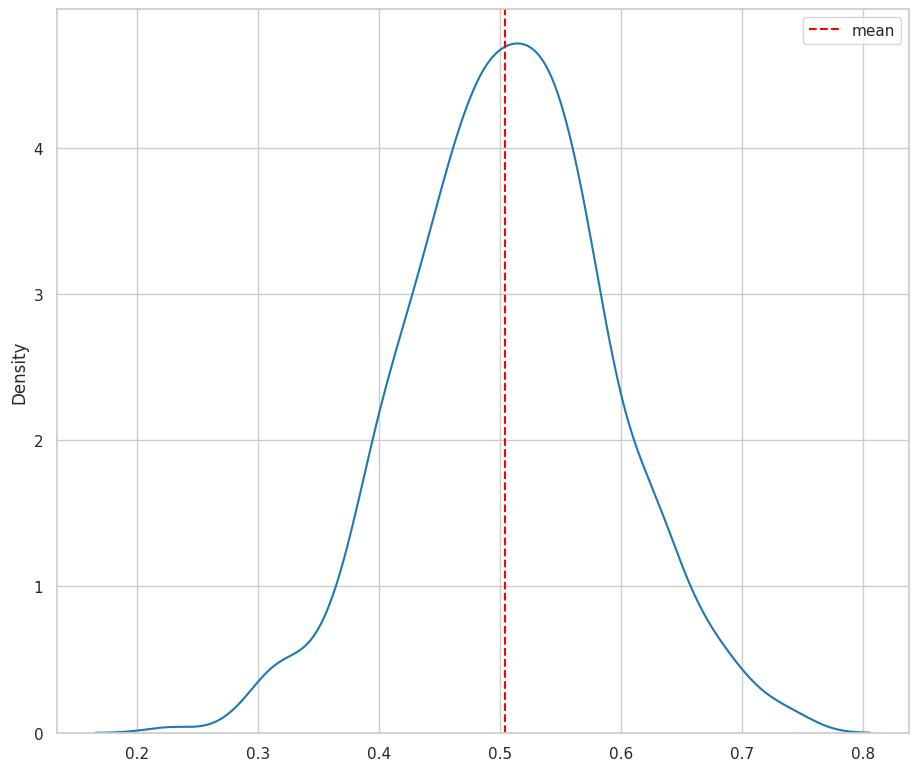

In [ ]:
sample_mean_binomial = pd.DataFrame(samples_df.mean(),columns=['sample_mean'])
sns.kdeplot(
    data=sample_mean_binomial
)
plt.axvline(x=sex_numeric.mean(),
            color='red',
            linestyle='dashed',
            label='mean')
plt.legend()
plt.show()

In [ ]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)
sample_size_experiment 

sample_size  estimated_mean
0              1        0.628571
1              2        0.657143
2              3        0.600000
3              4        0.592857
4              5        0.537143
..           ...             ...
995          996        0.507258
996          997        0.507207
997          998        0.507300
998          999        0.507279
999         1000        0.507343

[1000 rows x 2 columns]

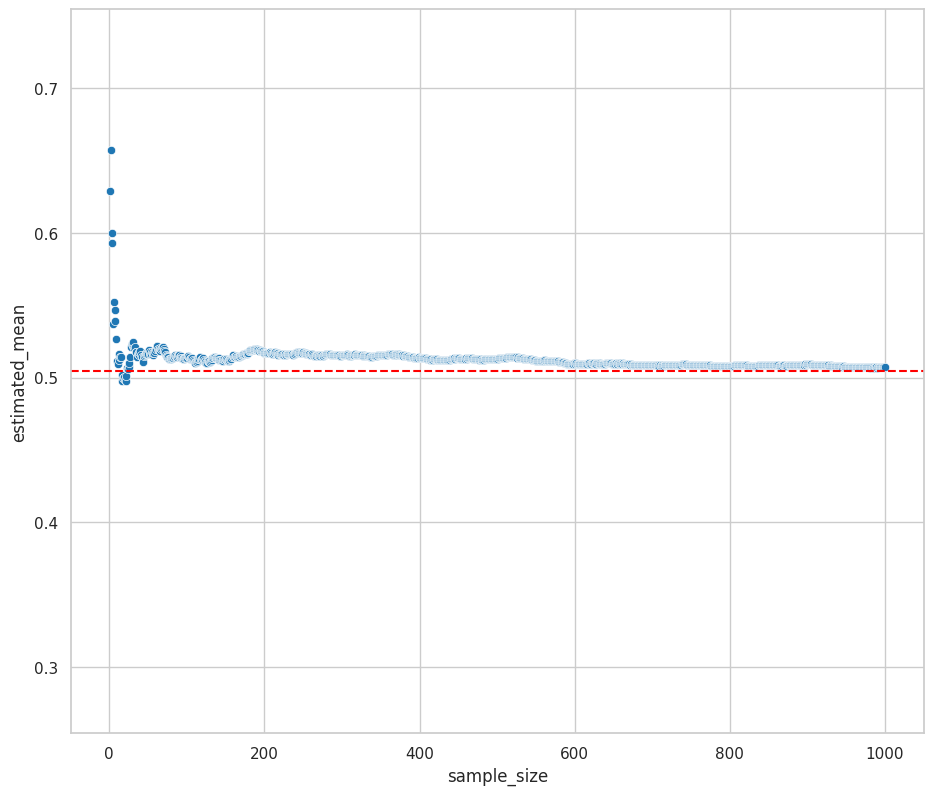

In [ ]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.25, sex_numeric.mean() + 0.25])
plt.show()

# Estableciendo relaciones: Gráfica de puntos

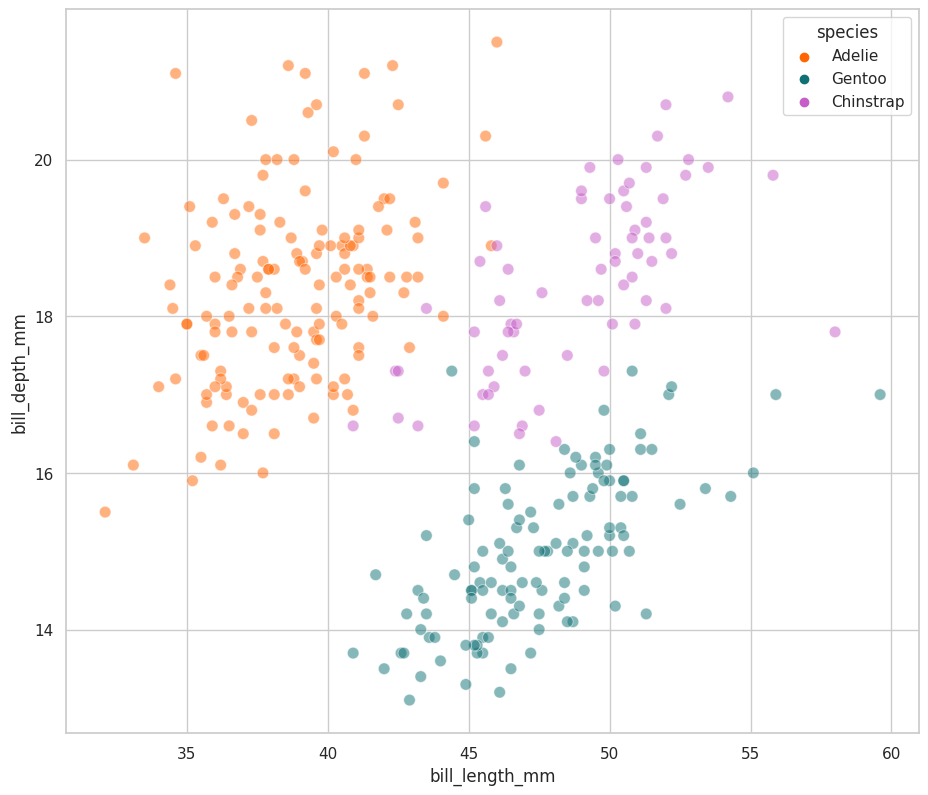

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    alpha=0.5,
    s=70,
    palette=penguin_color
)
plt.show()

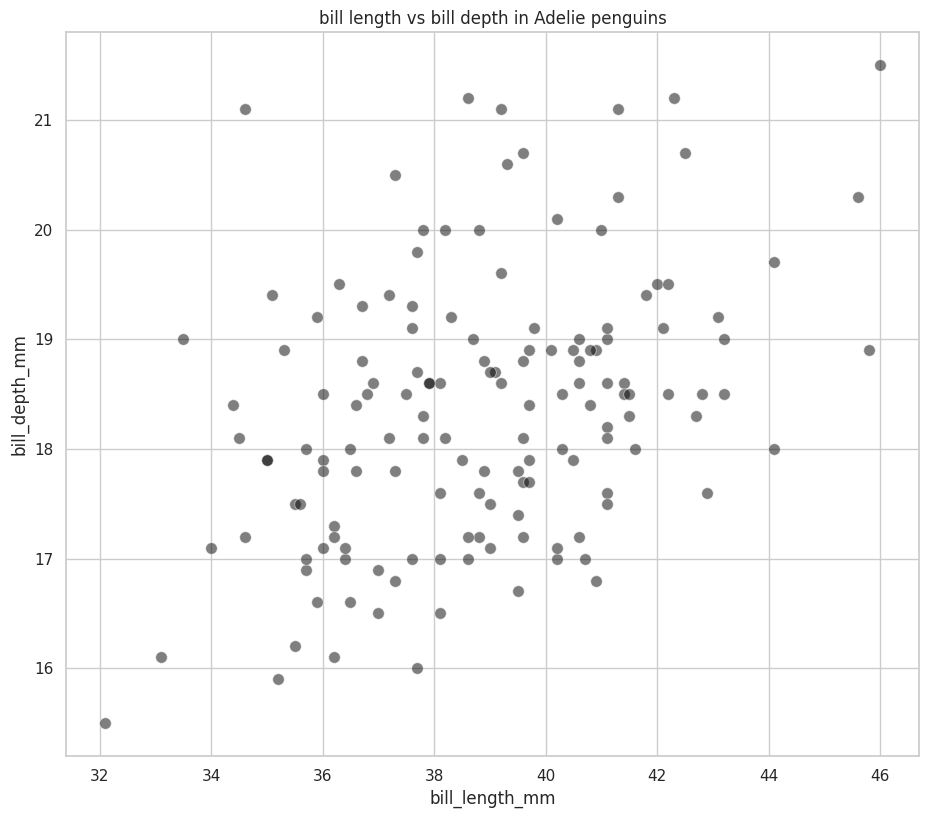

In [ ]:
sns.scatterplot(
    data= processed_penguins_df,
    x= processed_penguins_df[processed_penguins_df.species=='Adelie'].bill_length_mm,
    y=processed_penguins_df[processed_penguins_df.species=='Adelie'].bill_depth_mm,
    alpha=0.5,
    s=70,
    color='black'
)
plt.title('bill length vs bill depth in Adelie penguins')
plt.show()

In [ ]:
processed_penguins_df[processed_penguins_df.species=='Chinstrap'].bill_length_mm


276    46.5
277    50.0
278    51.3
279    45.4
280    52.7
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: bill_length_mm, Length: 68, dtype: float64

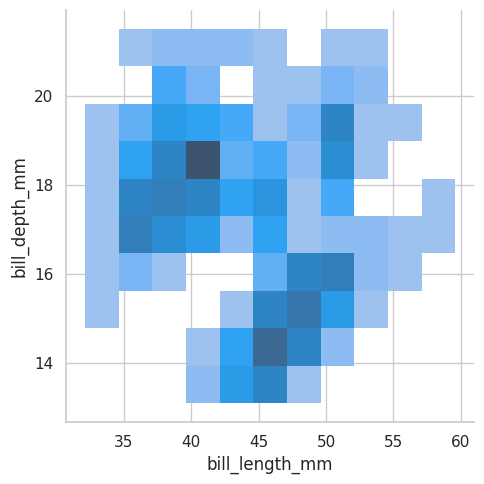

In [ ]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    
)

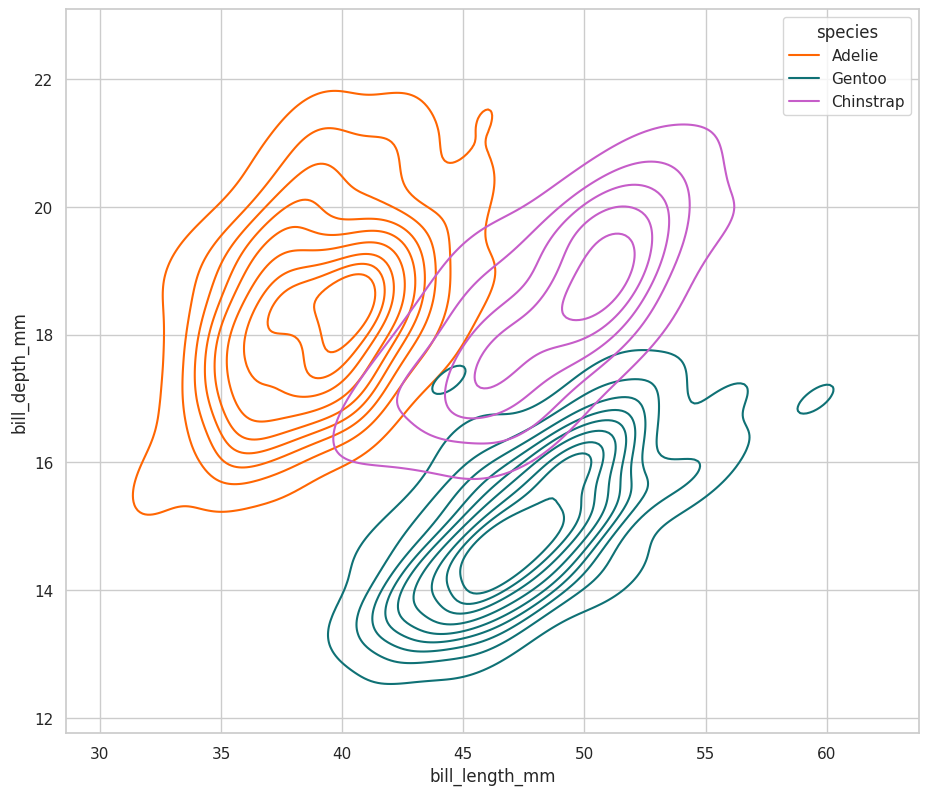

In [ ]:
# Aqui se pueden observar las proporciones
sns.kdeplot(
     data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

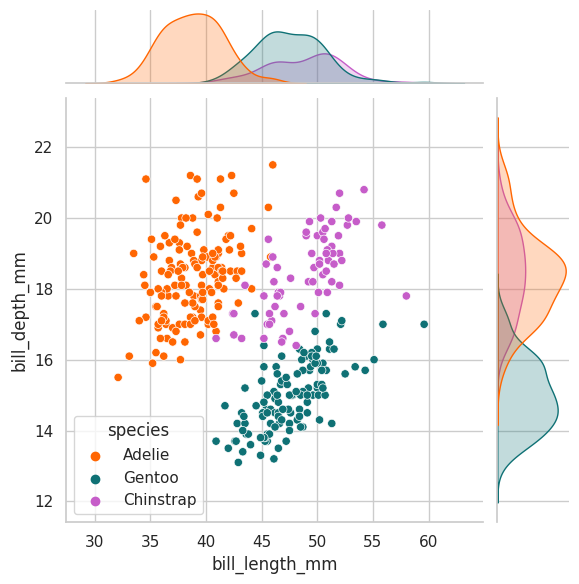

In [ ]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

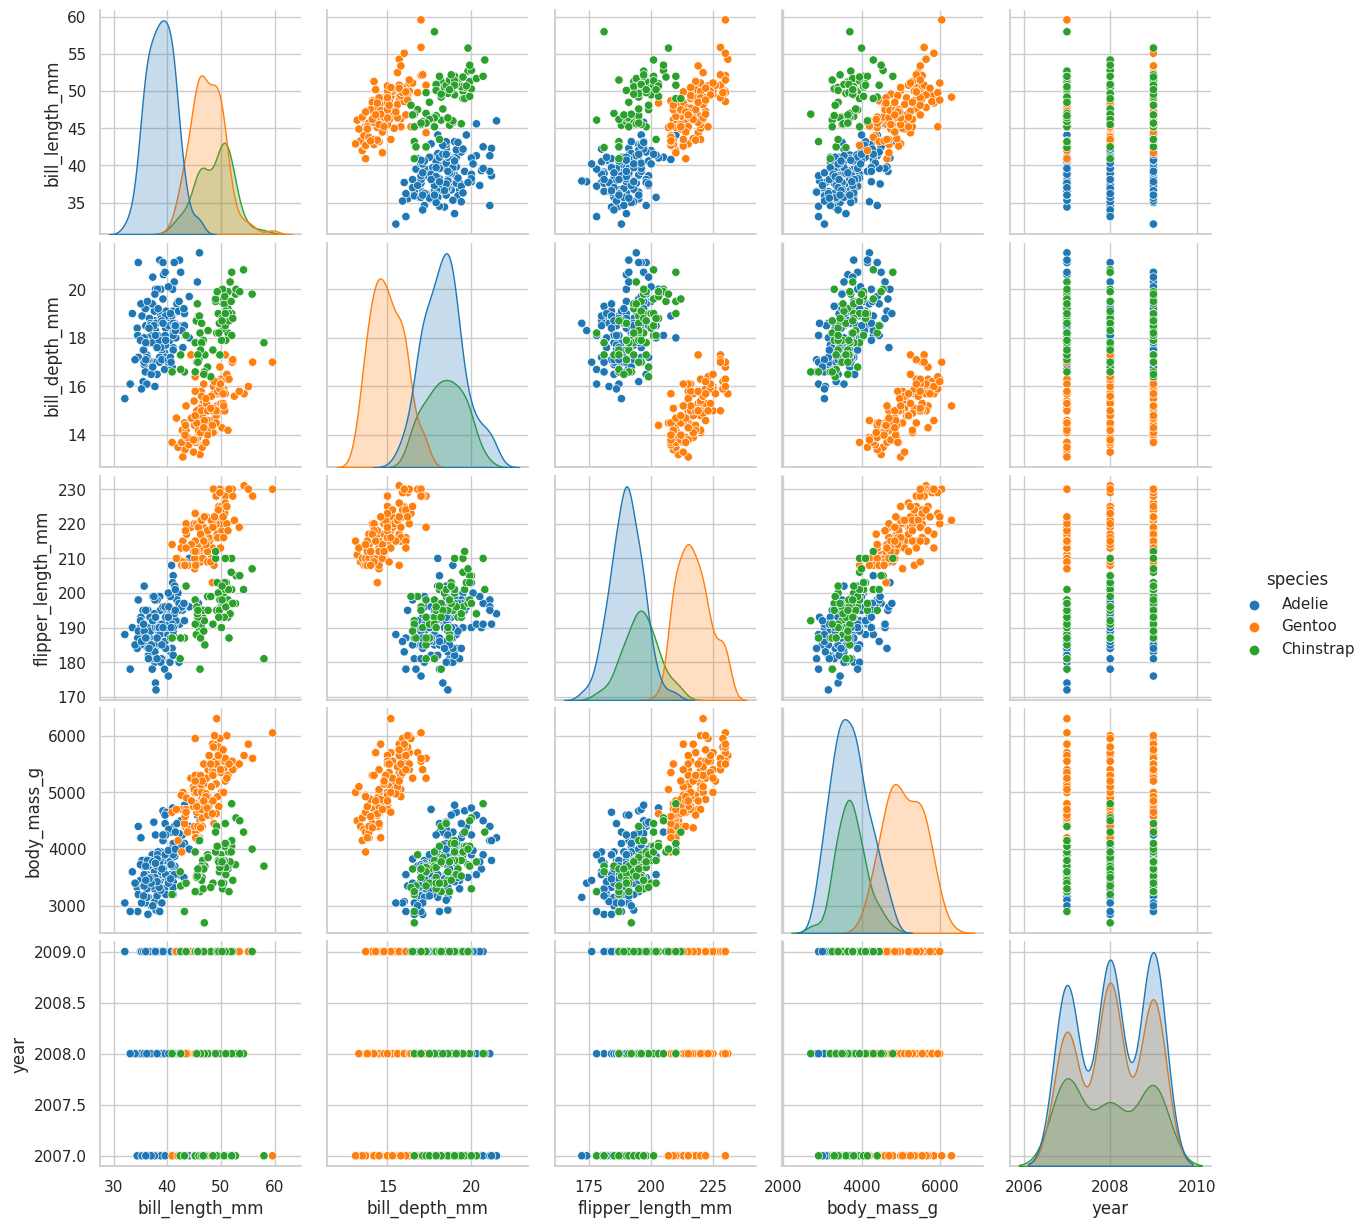

In [ ]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

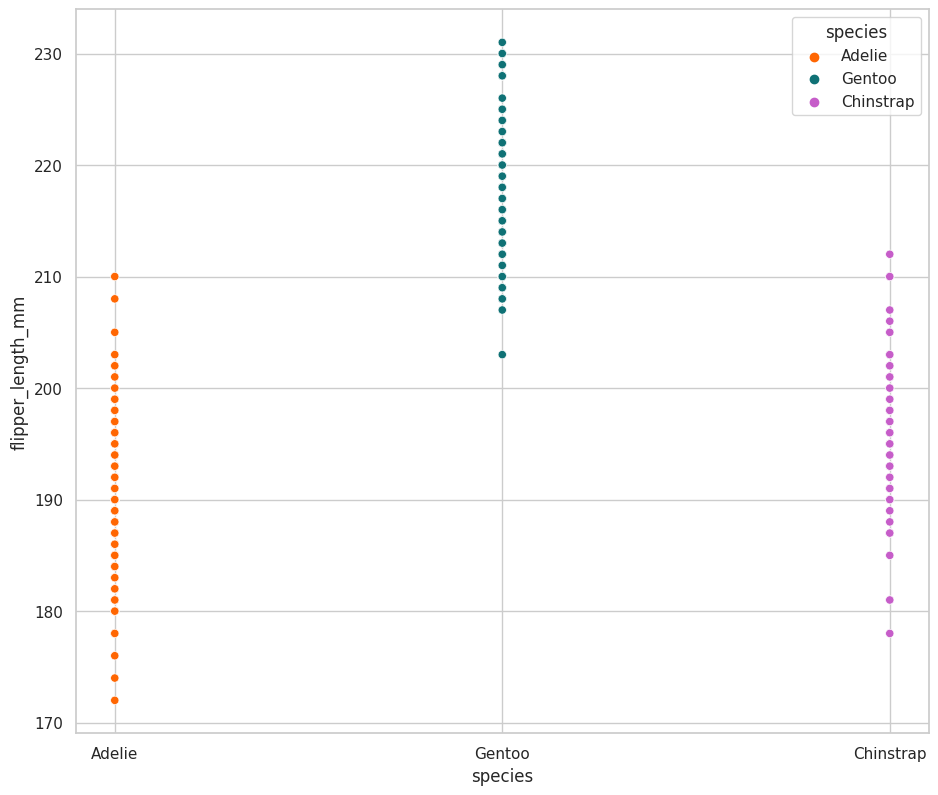

In [ ]:
#Diagrama de dispersión
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

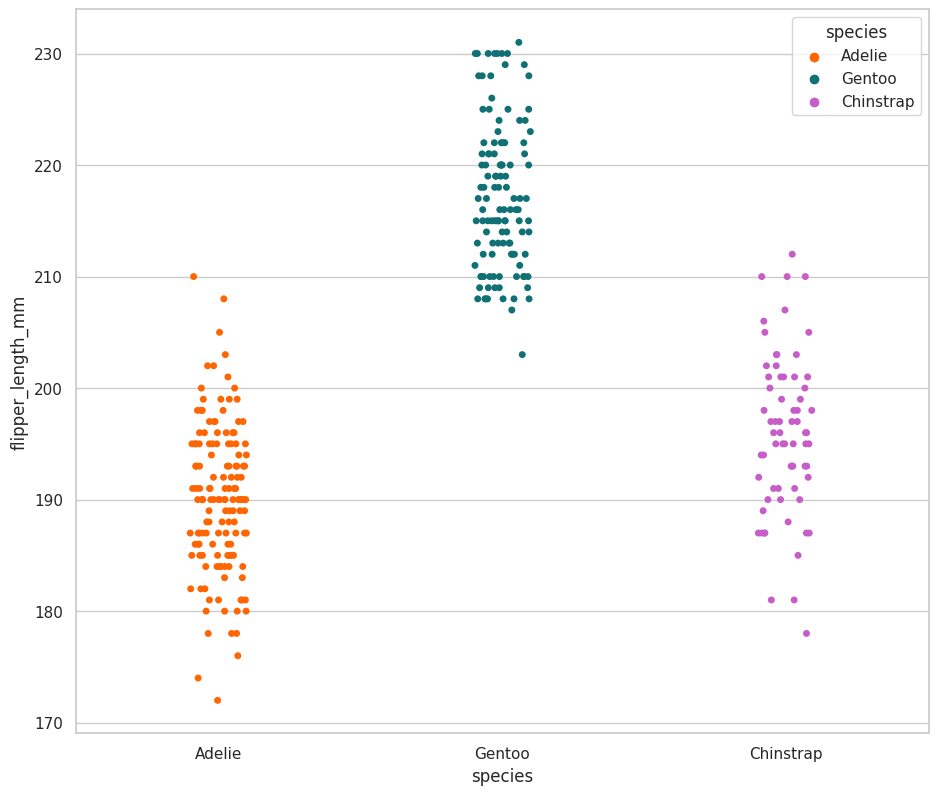

In [ ]:
#Diagrama de dispersión categórico 
sns.stripplot(
    data= processed_penguins_df,
    x= 'species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color

)
plt.show()

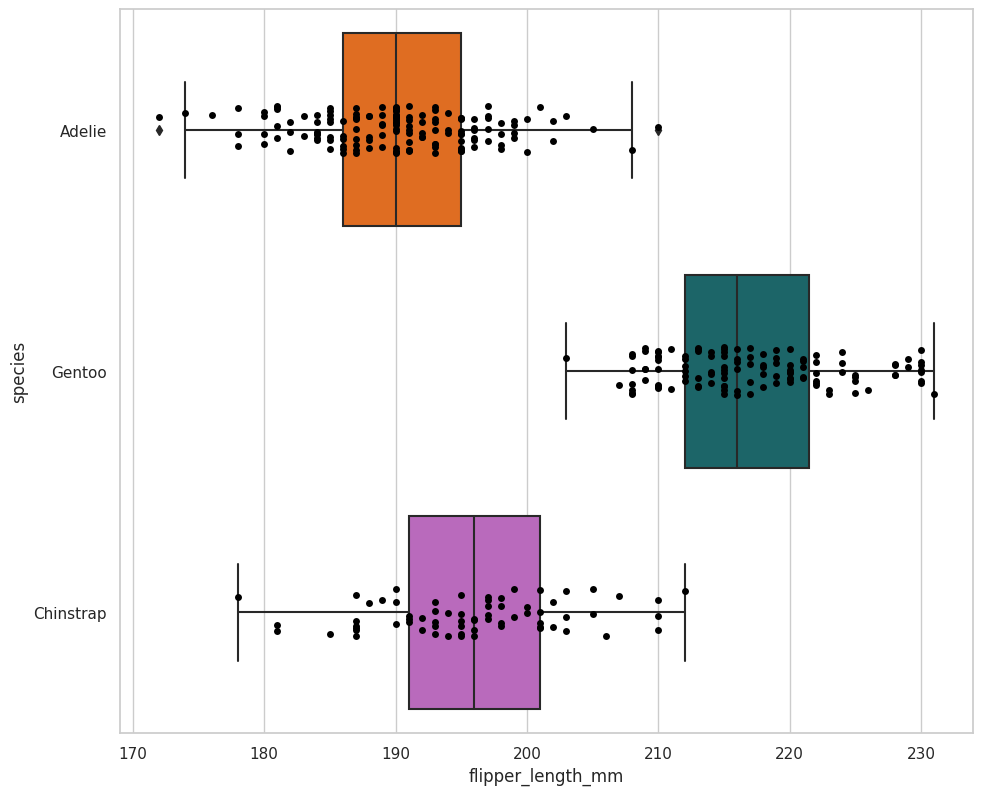

In [ ]:
#Graficos de boxplot combinado con dispersión categorica
ax= sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette = penguin_color
)
ax= sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='black'

)

plt.show()

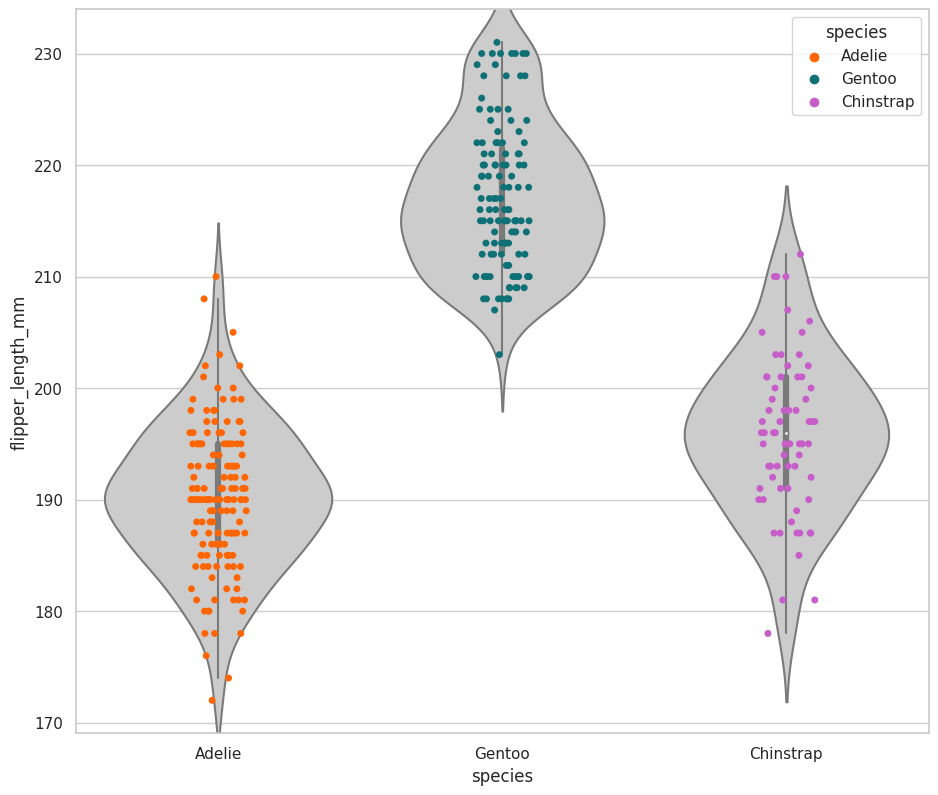

In [ ]:
#Grafico de violinplot combinado con dispersión categorica, el violinplot funciona como un kde, se puede observar la densidad de los datos
ax= sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8' # Color grisaceo
)
ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color

)

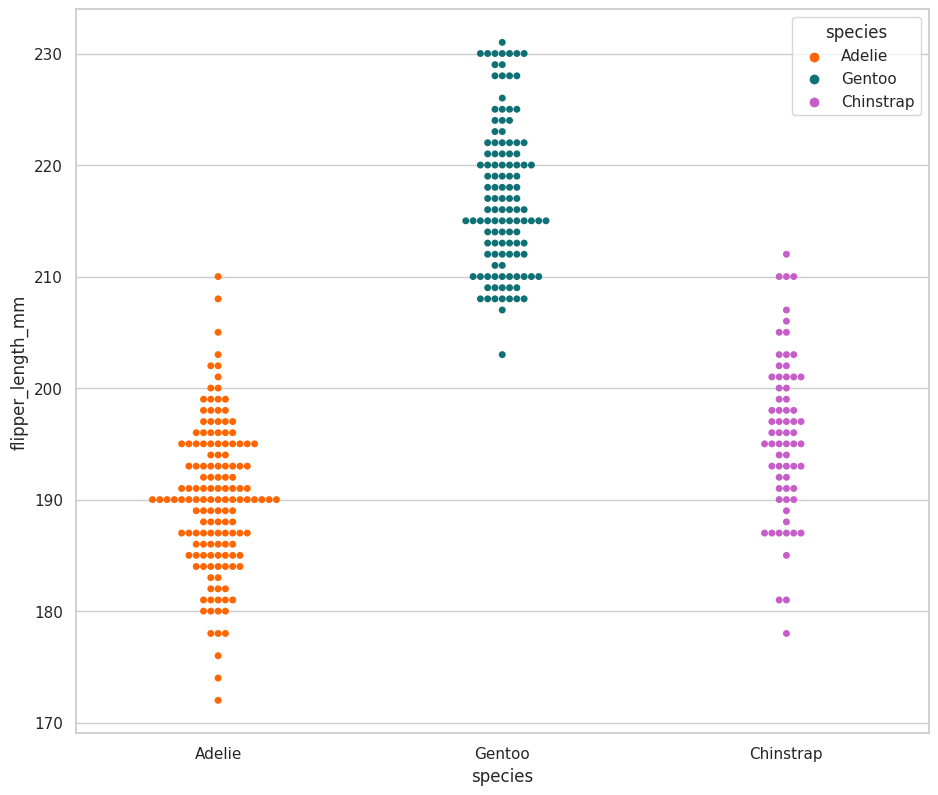

In [ ]:
#Grafico de dispersión categórico con puntos no superpuestos
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [ ]:
#Matriz de correlación
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Cómo puedo visualizar los coeficientes de correlación?

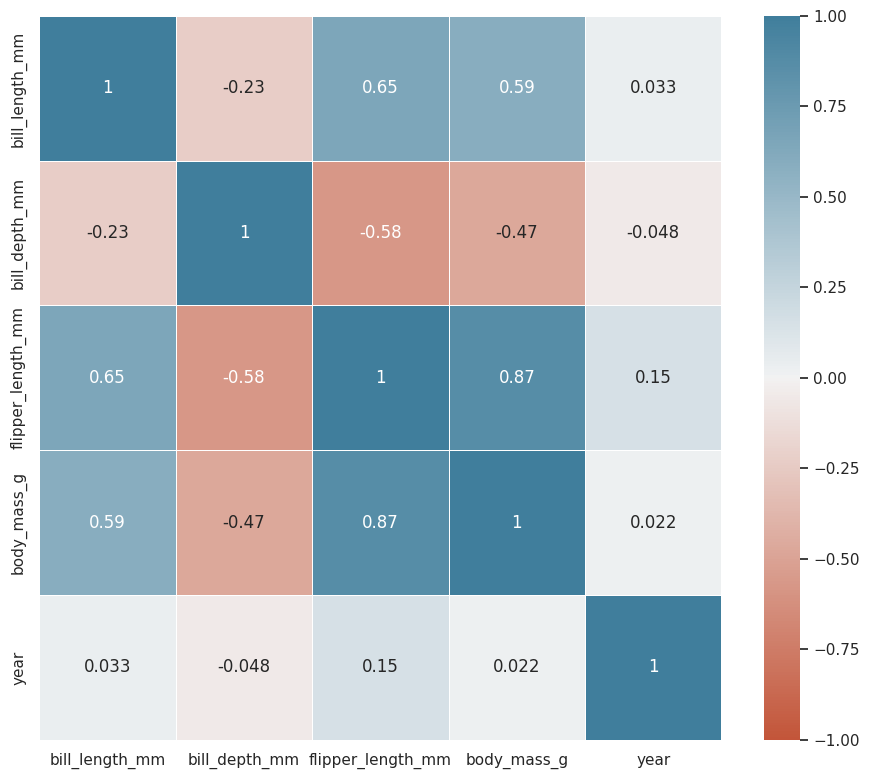

In [ ]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    linewidth = 0.5,
    center = 0,
    vmin= -1,
    vmax = 1,
    annot = True,
    cmap= sns.diverging_palette(20,230,as_cmap=True)

)
plt.show()

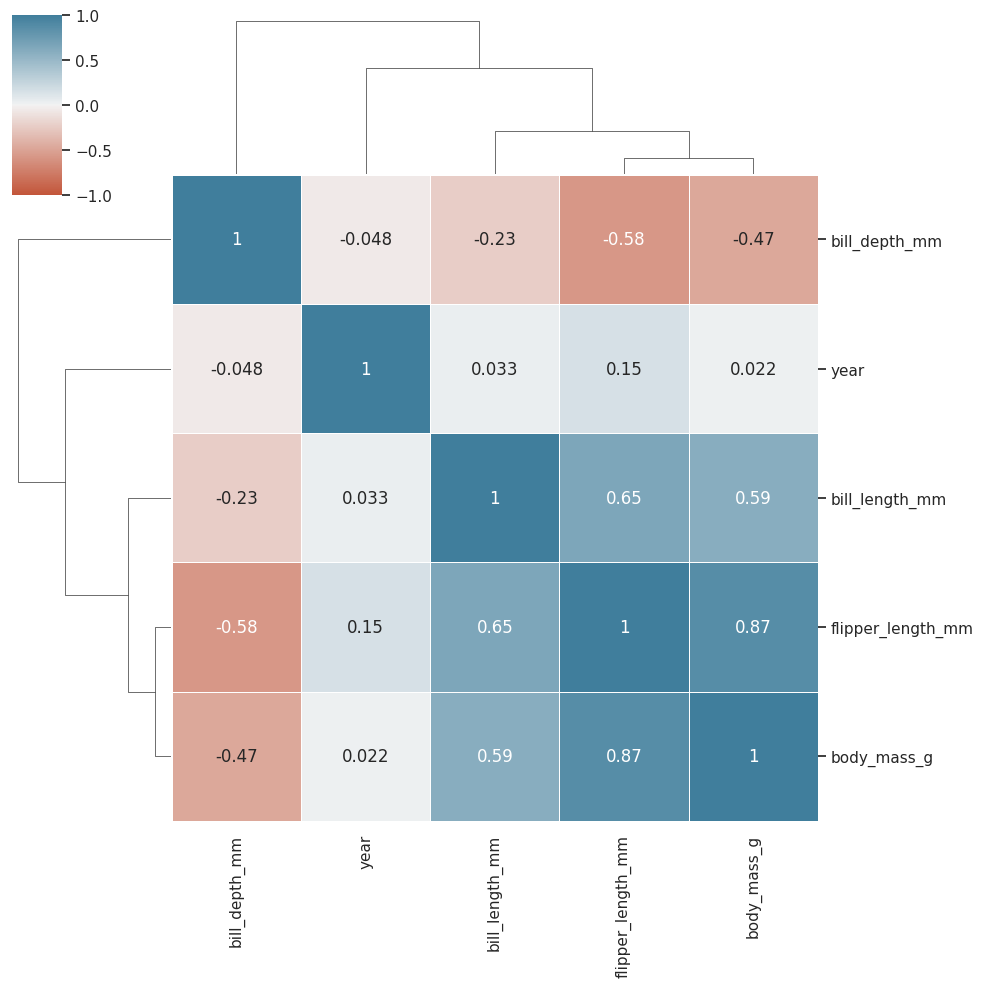

In [ ]:
#Agrupación de datos por correlación
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    linewidth = 0.5,
    center = 0,
    vmin= -1,
    vmax = 1,
    annot = True,
    cmap= sns.diverging_palette(20,230,as_cmap=True)

)
plt.show()

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [ ]:
processed_penguins_df=(
    processed_penguins_df
    .assign(
        numeric_sex=lambda df:df.sex.replace(['male','female'],[1,0])
    )
 
)
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  numeric_sex  
0         3750.0    male  2007            1  
1         3800.0  female  2007            0  
2         3250.0  female  2007            0  
4         3450.0  female  2007            0  
5         3650.0    male  2007            1  
..           ...     ...   ...          ...  
339       4000.0    male  2009            1  
340       3400.0  female  2009            0  
341       3775.0    male  2009            1  
342       4100.0    male  2009            1  
343       3775.0  female  2009            0  

[333 rows x 9 columns]

In [ ]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   
numeric_sex              0.344078       0.372673           0.255169   

                   body_mass_g      year  numeric_sex  
bill_length_mm        0.589451  0.032657     0.344078  
bill_depth_mm        -0.472016 -0.048182     0.372673  
flipper_length_mm     0.872979  0.151068     0.255169  
body_mass_g           1.000000  0.021862     0.424987  
year                  0.021862  1.000000    -0.000467  
numeric_sex           0.424987 -0.000467     1.000000

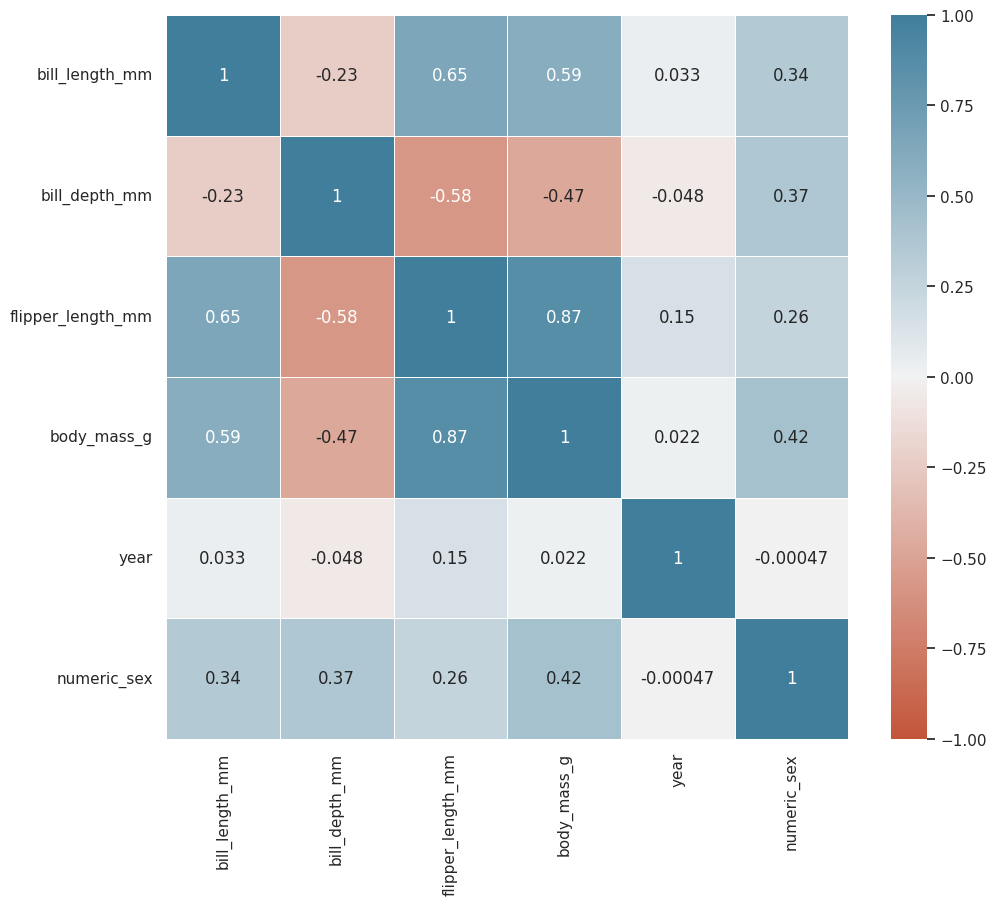

In [ ]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    linewidth = 0.5,
    center = 0,
    vmin= -1,
    vmax = 1,
    annot = True,
    cmap= sns.diverging_palette(20,230,as_cmap=True)

)
plt.show()

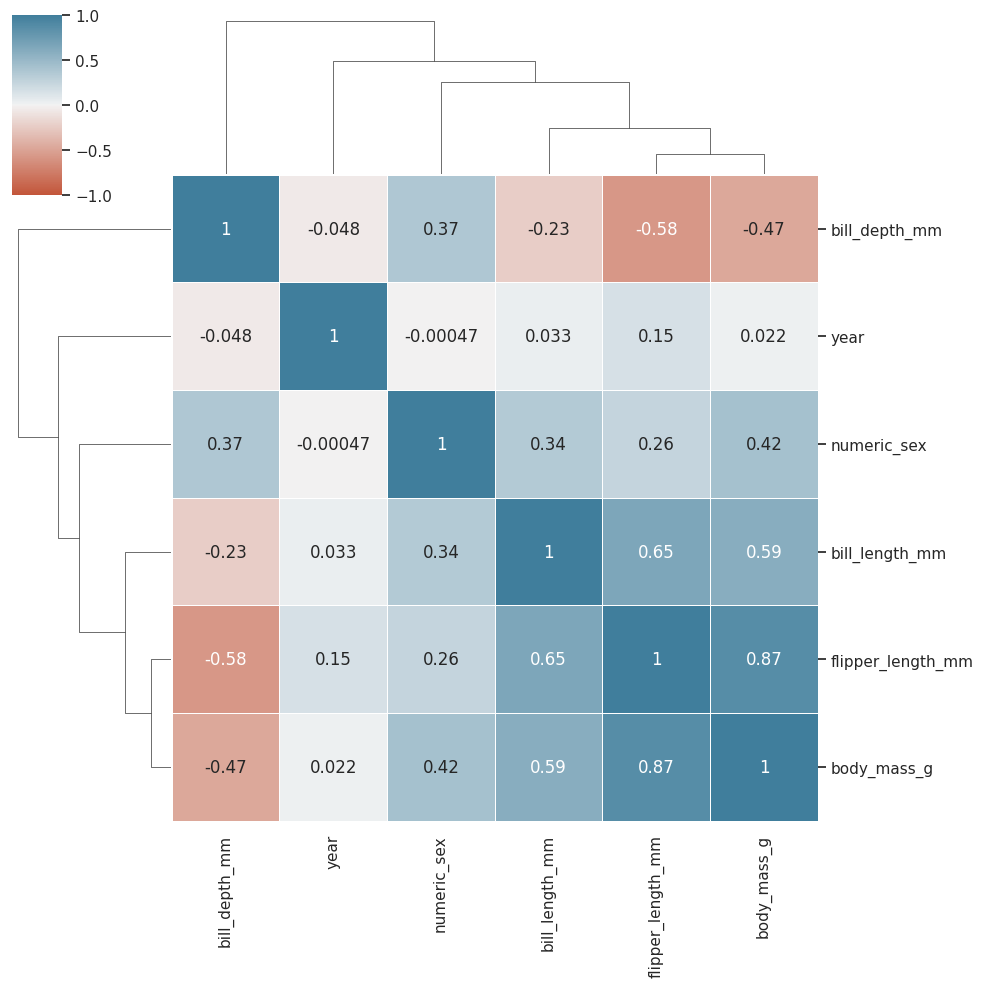

In [ ]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    linewidth = 0.5,
    center = 0,
    vmin= -1,
    vmax = 1,
    annot = True,
    cmap= sns.diverging_palette(20,230,as_cmap=True)

)
plt.show()

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.01246842],
       [0.01246842, 1.        ]])

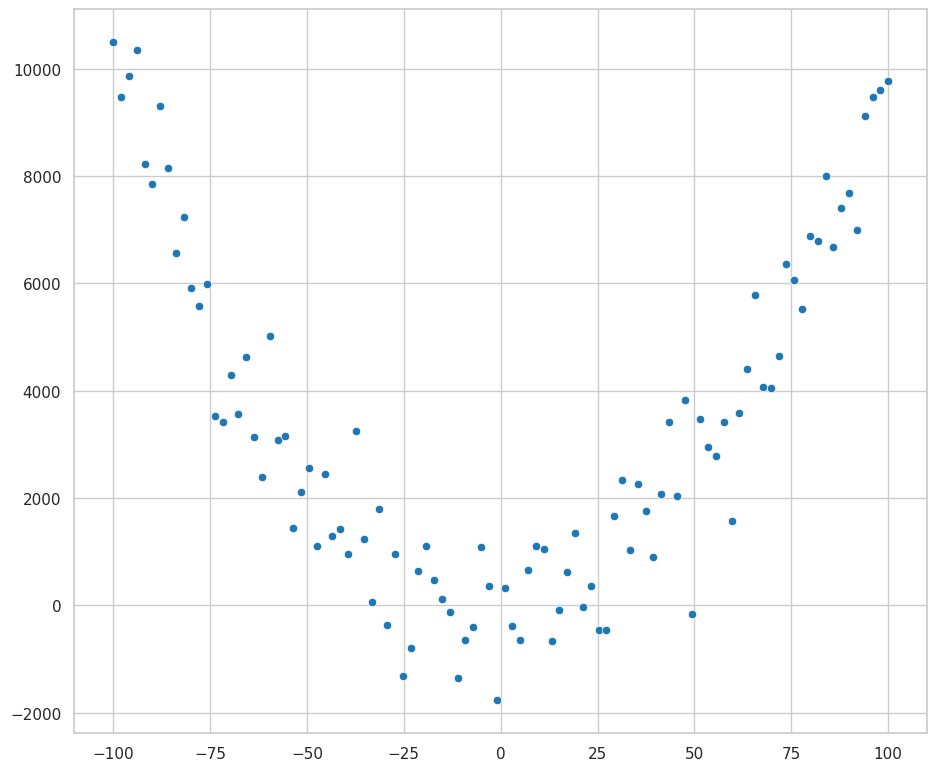

In [ ]:
# Se puede observar que existe una correlación que no necesariamente es lineal
np.random.seed(42)
x = np.linspace(-100,100,100)
y= x**2
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x,y)

array([[1.        , 0.91677725],
       [0.91677725, 1.        ]])

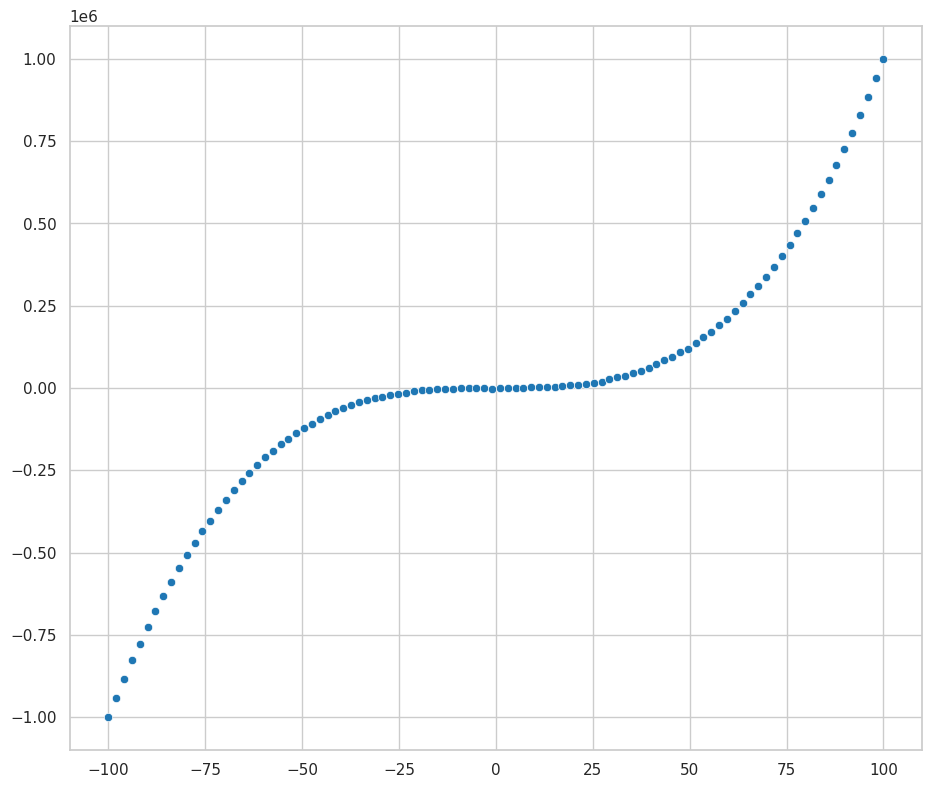

In [ ]:
# Según los coeficientes de correlación, existe una relación lineal pero se sabe que no es así, por ello es que por si solos no son información representativa 
np.random.seed(42)
x = np.linspace(-100,100,100)
y= x**3
y += np.random.normal(0,1000,x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x,y)

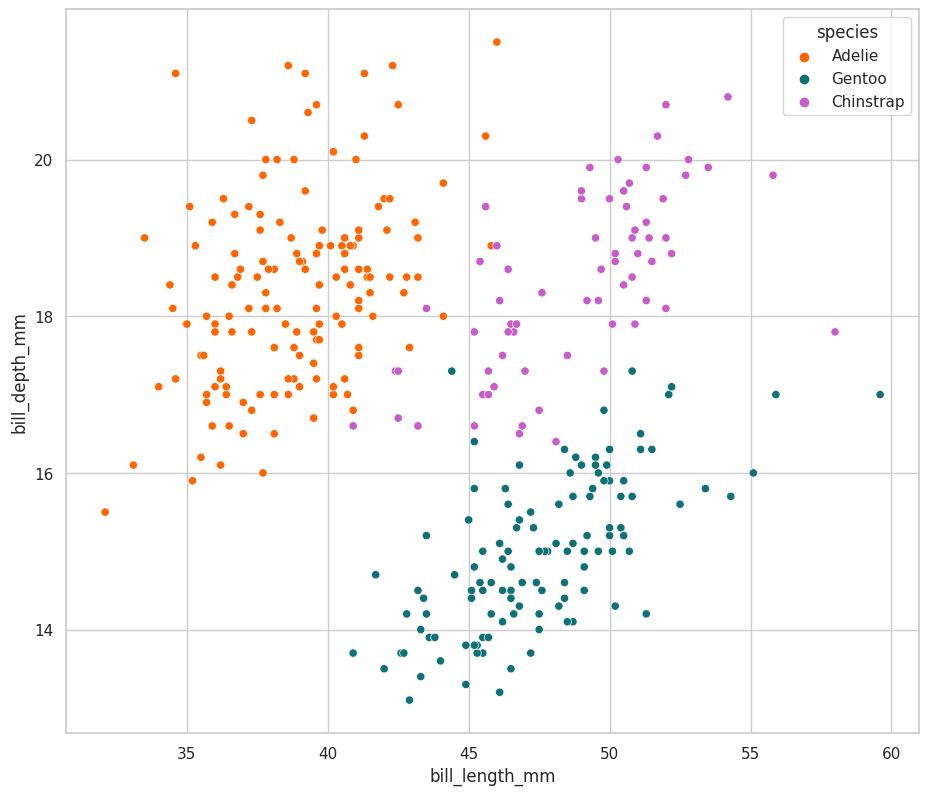

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)
plt.show()

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


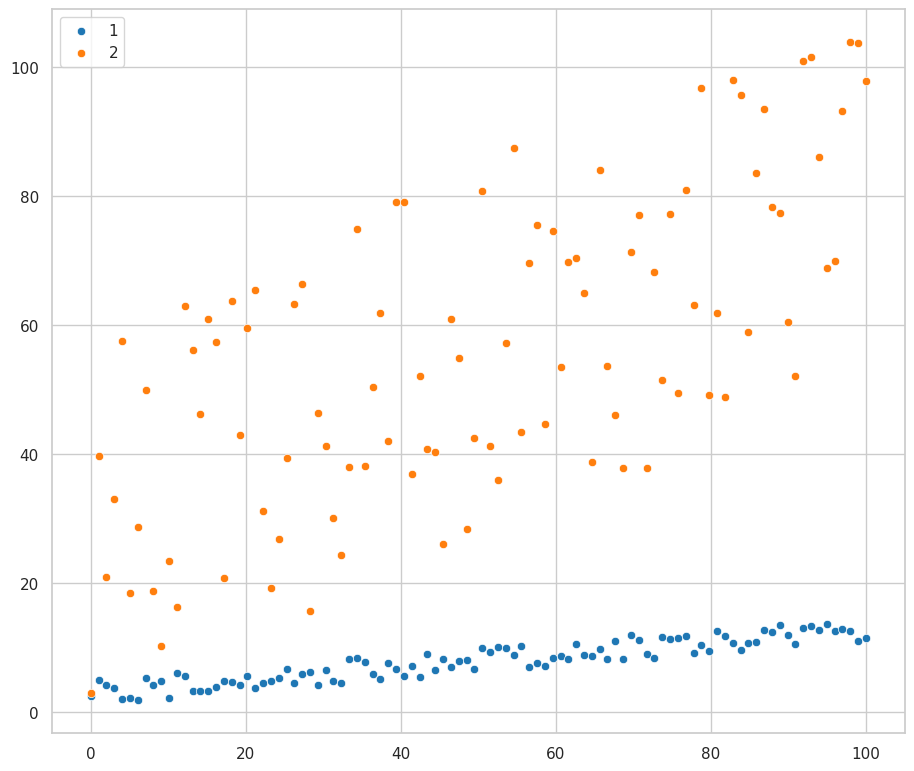

In [ ]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [ ]:
result_1=scipy.stats.linregress(x = x1,y = y1)
result_2=scipy.stats.linregress(x = x2,y = y2)
print(result_1,result_2,sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


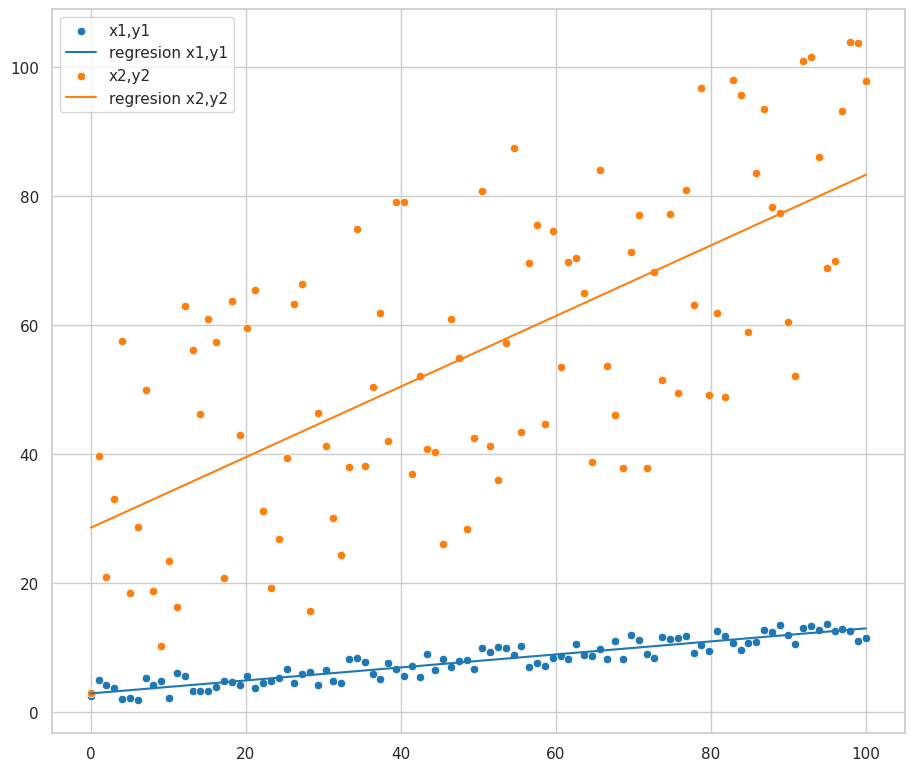

In [ ]:
#Grafico de dispersión junto con sus lineas de regresión
sns.scatterplot(x=x1, y=y1,label='x1,y1')

fx_1= np.array([x1.min(),x1.max()])
fy_1=result_1.intercept+result_1.slope*fx_1
plt.plot(fx_1,fy_1,label='regresion x1,y1')
sns.scatterplot(x=x2, y=y2,label='x2,y2')
fx_2= np.array([x2.min(),x2.max()])
fy_2=result_2.intercept+result_2.slope*fx_1
plt.plot(fx_2,fy_2,label='regresion x2,y2')
plt.legend()
plt.show()

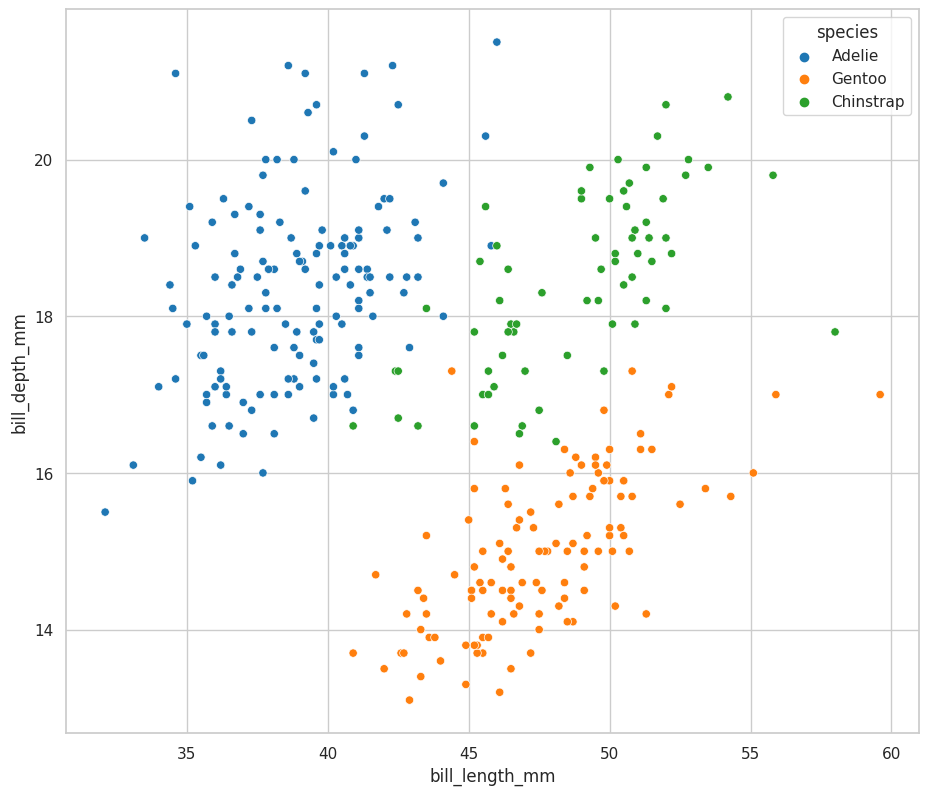

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)
plt.show()

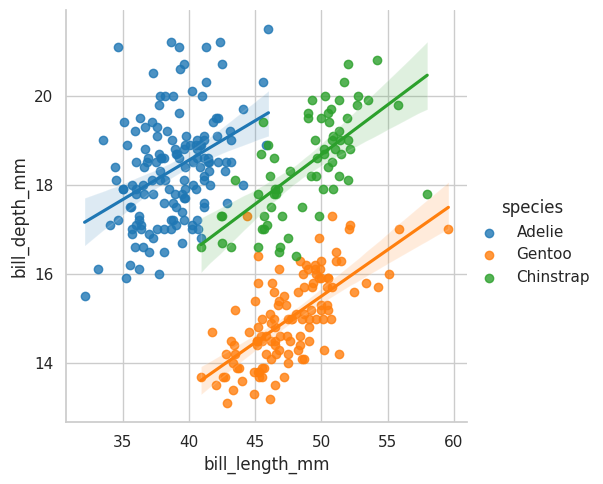

In [ ]:
#Grafico de regresión
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'    
)
plt.show()

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [ ]:
x= processed_penguins_df.bill_length_mm
y= processed_penguins_df.bill_depth_mm  

result_x_y=scipy.stats.linregress(x=x,y=y)
result_y_x=scipy.stats.linregress(x=y,y=x)

print(result_x_y,result_y_x,sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


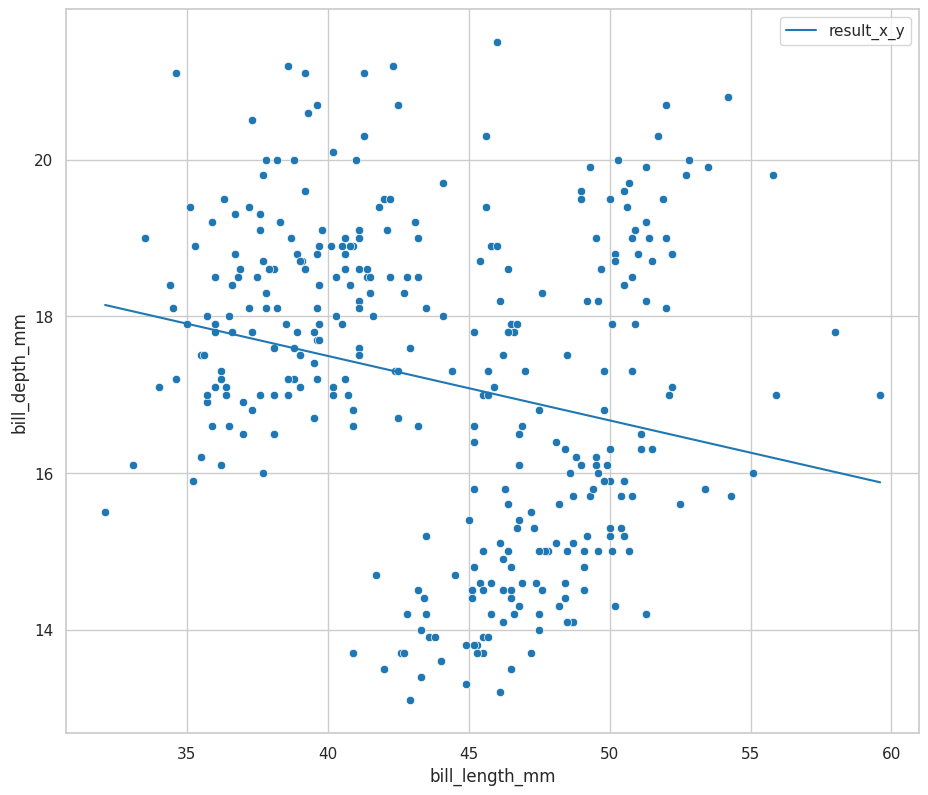

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)
fx_1= np.array([x.min(),x.max()])
fy_1 = result_x_y.intercept + result_x_y.slope*fx_1
plt.plot(fx_1,fy_1, label='result_x_y')
plt.legend()
plt.show()

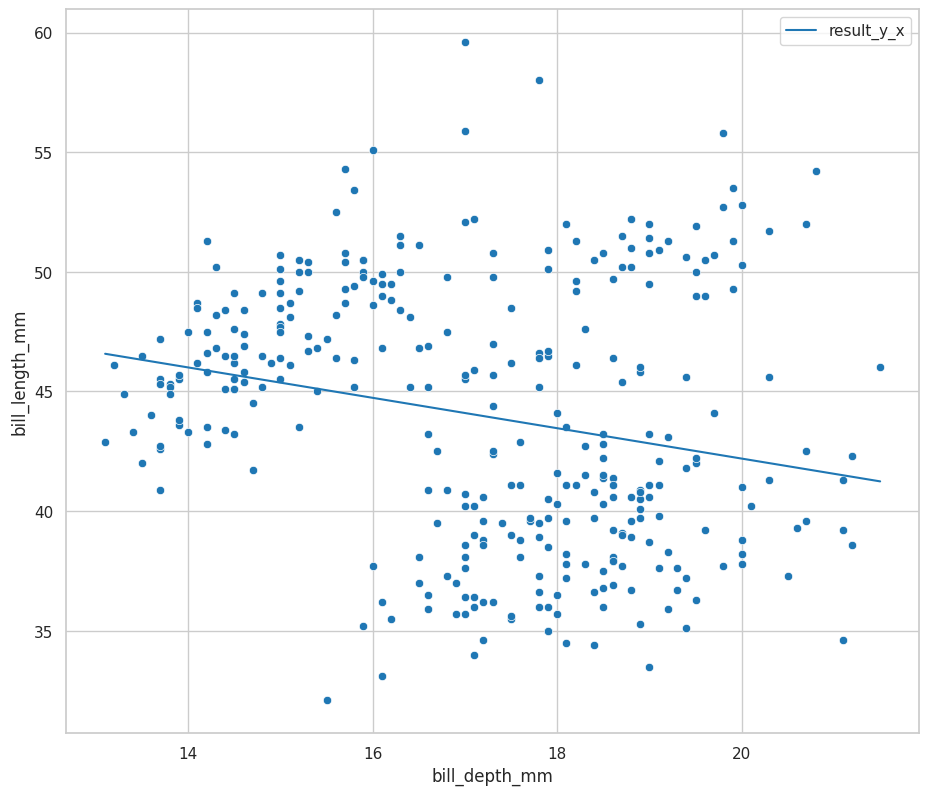

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)
fx_2= np.array([y.min(),y.max()])
fy_2 = result_y_x.intercept + result_y_x.slope*fx_2
plt.plot(fx_2,fy_2, label='result_y_x')
plt.legend()
plt.show()

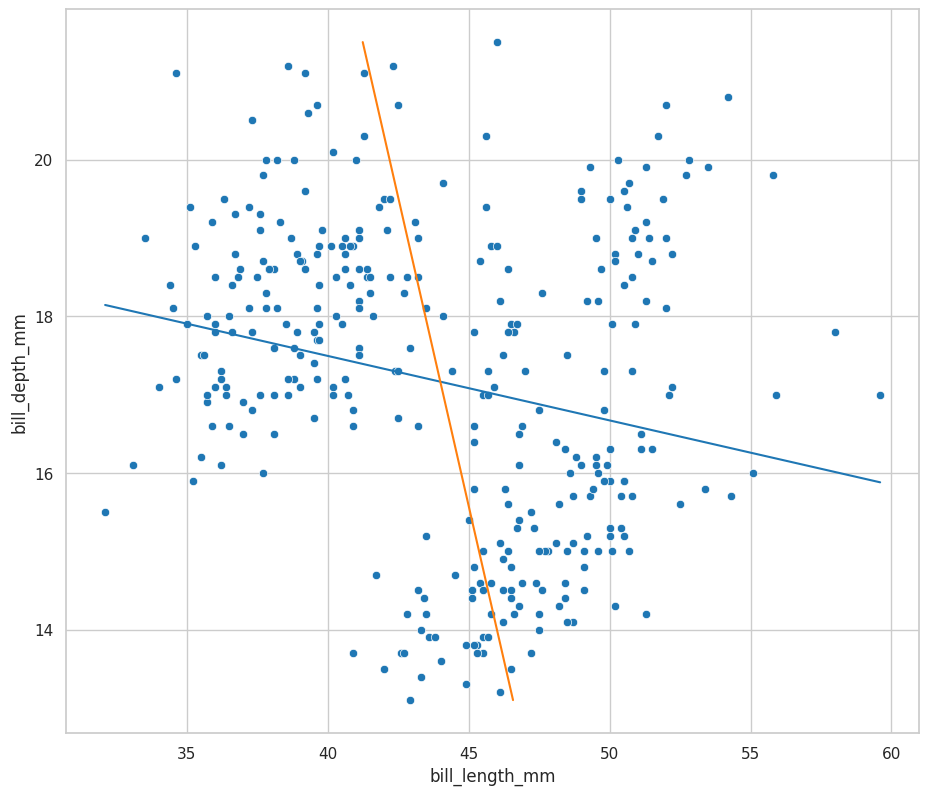

In [ ]:
sns.scatterplot(
x=x,
y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2);

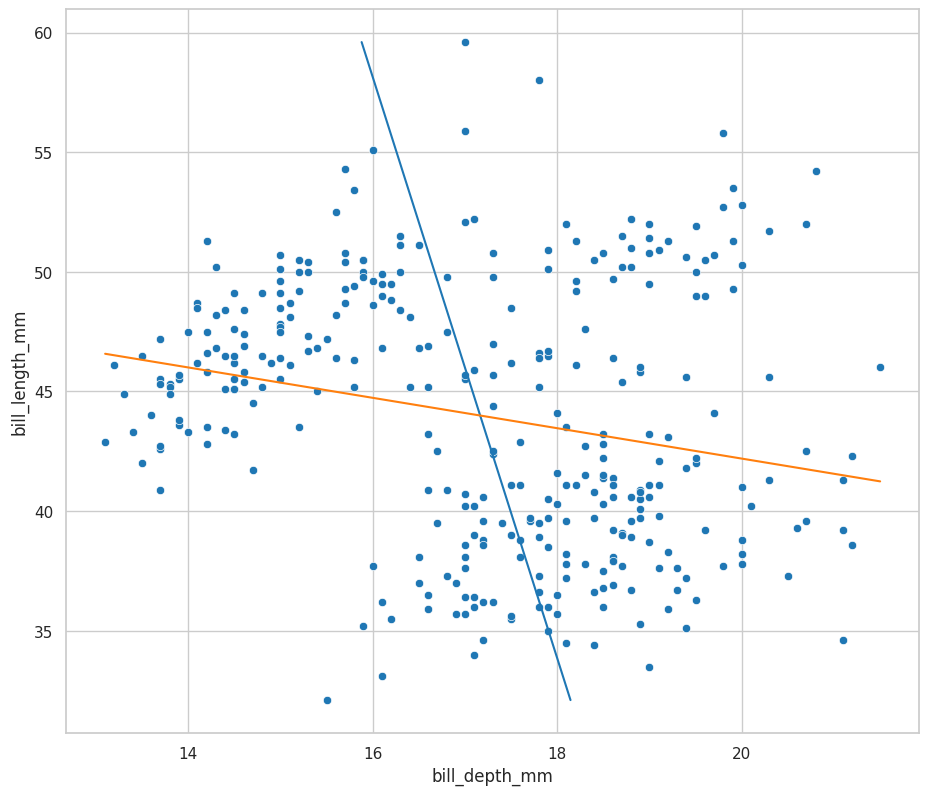

In [ ]:
sns.scatterplot(
x=y,
y=x
)
plt.plot(fy_1, fx_1)
plt.plot(fx_2, fy_2);

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [ ]:
# variable dependiente(y) ~ variable independiente(x)'
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [ ]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

El modelo quiere decir con su pendiente que por cada cambio en la longitud del pico, esto equivale a un aumento de 86,79g

El modelo representa un 34,7% de la variabilidad. 

In [ ]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.54e-32
Time:                        15:59:38   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

El modelo quiere decir que por cada cambio en la longitud del pico, aumenta la masa corporal en 74,81g pero también por cada cambio en la altura del pico, esto se traduce a una reducción de peso de 145g.

El modelo representa un 46,7% de la variabilidad. 

In [ ]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 31 May 2023   Prob (F-statistic):           7.04e-46
Time:                        16:01:18   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

El modelo quiere decir que por cada cambio en la longitud del pico, aumenta la masa corporal en 3.29g en la altura del pico, esto se traduce a un aumento de peso de 17.83g y en la longitud del ala de 50,76g.

El modelo representa un 76,4% de la variabilidad. 

In [ ]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=processed_penguins_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 31 May 2023   Prob (F-statistic):          9.26e-103
Time:                        16:01:56   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

El modelo nos quiere decir que por cada aumento de la longitud del pico, se reduce el peso en 2,32g, al aumentar la altura del pico, se reduce 86,08g, al aumentar el tamaño del ala, aumenta en 38,82g y los machos pesan 541.02g mas que las hembras.

El modelo representa un 82,3% de la variabilidad. 

In [ ]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 31 May 2023   Prob (F-statistic):          6.28e-122
Time:                        16:02:51   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 

Podemos observar con el modelo 5 que con solo dos variables podemos explicar casi la misma variabilidad que el modelo con 4 variables. Esto es porque las variables aqui analizadas están más correlacionadas, por ello son así de explicativas. 

In [ ]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Wed, 31 May 2023   Prob (F-statistic):          3.53e-118
Time:                        16:03:48   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [ ]:
models_result = pd.DataFrame(
    dict(
        actual_values= processed_penguins_df.body_mass_g,
        prediction_model_1= model_1.predict(),
        prediction_model_2= model_2.predict(),
        prediction_model_3= model_3.predict(),
        prediction_model_4= model_4.predict(),
        prediction_model_5= model_5.predict(),
        species=processed_penguins_df.species,
        sex=processed_penguins_df.sex
    )
)
models_result

actual_values  prediction_model_1  prediction_model_2  \
0           3750.0         3782.402961         3617.641192   
1           3800.0         3817.119665         3836.725580   
2           3250.0         3886.553073         3809.271371   
4           3450.0         3574.102738         3350.786581   
5           3650.0         3799.761313         3356.140070   
..             ...                 ...                 ...   
339         4000.0         5231.825347         4706.954140   
340         3400.0         4164.286703         4034.121055   
341         3775.0         4693.716437         4475.927353   
342         4100.0         4797.866549         4449.296758   
343         3775.0         4745.791493         4448.061337   

     prediction_model_3  prediction_model_4  prediction_model_5    species  \
0           3204.761227         3579.136946         3441.323750     Adelie   
1           3436.701722         3343.220772         3328.384372     Adelie   
2           3906.897032         3639.137335         3751.223949     Adelie   
4           3816.705772         3457.954243         3657.259599     Adelie   
5           3696.168128         3764.536023         3864.163327     Adelie   
..                  ...                 ...                 ...        ...   
339         4599.187485         4455.022405         4662.860306  Chinstrap   
340         4274.552753         3894.857519         4080.099176  Chinstrap   
341         3839.563668         4063.639819         4005.109853  Chinstrap   
342         4720.740455         4652.013882         4803.806832  Chinstrap   
343         4104.268240         3672.299099         3892.170475  Chinstrap   

        sex  
0      male  
1    female  
2    female  
4    female  
5      male  
..      ...  
339    male  
340  female  
341    male  
342    male  
343  female  

[333 rows x 8 columns]

#### ECDFs

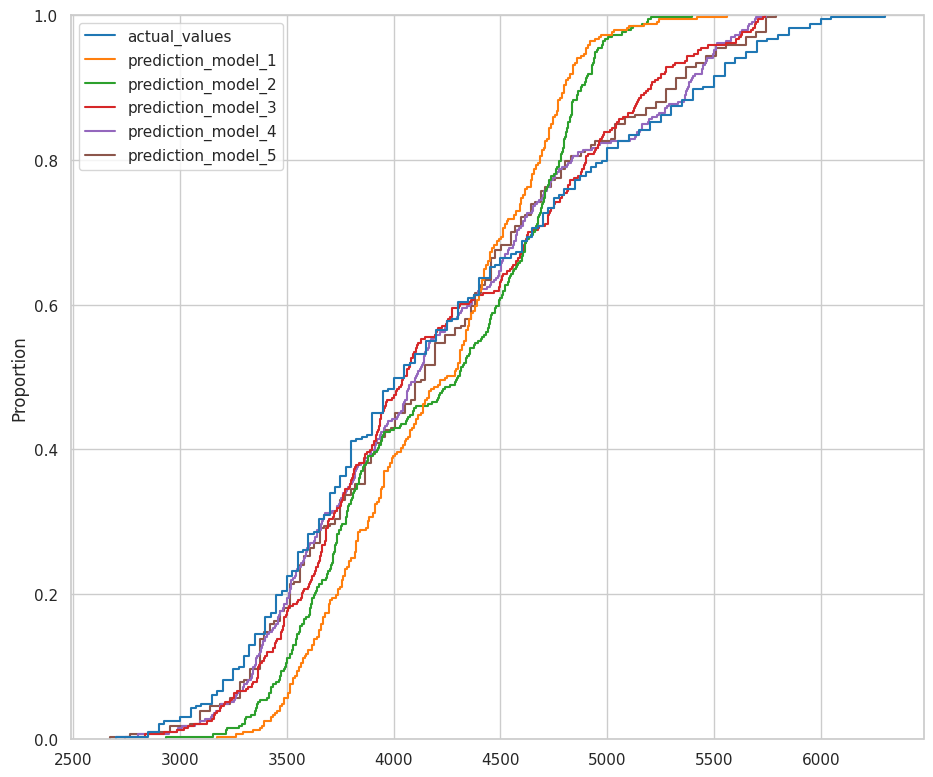

In [ ]:
sns.ecdfplot(
    data=models_result
)
plt.show()

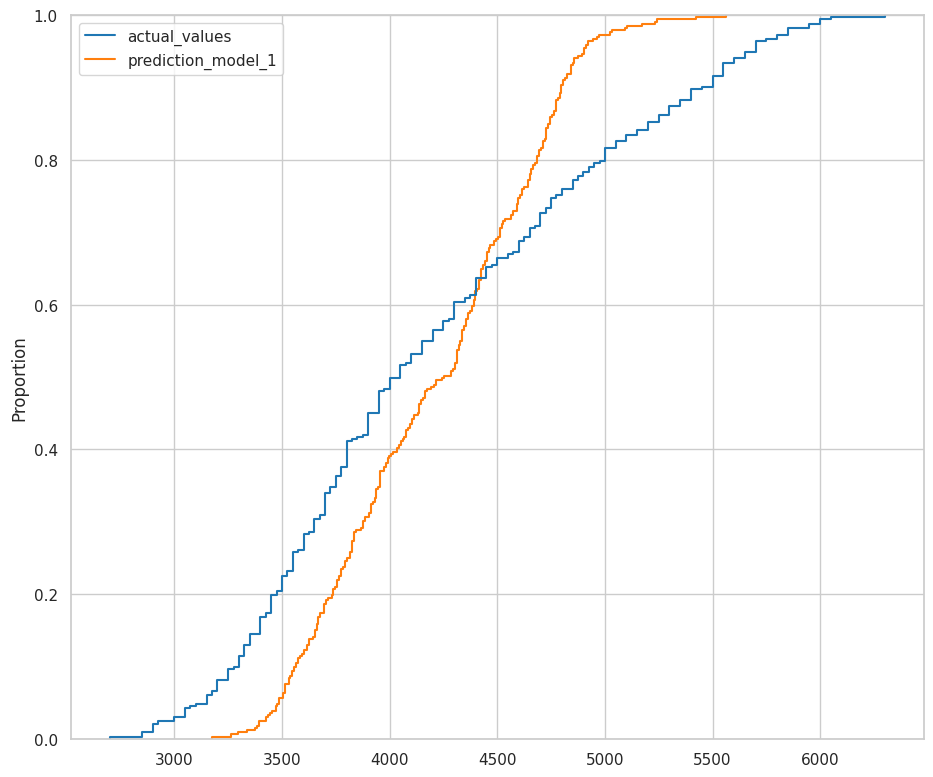

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_values','prediction_model_1'])
)
plt.show()

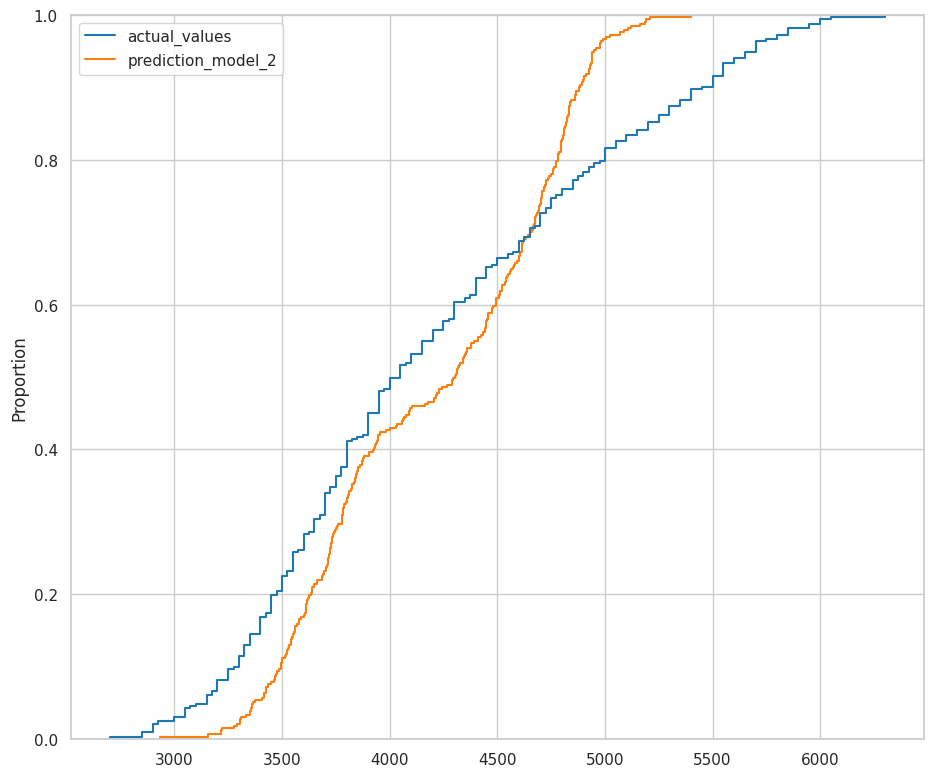

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_values','prediction_model_2'])
)
plt.show()

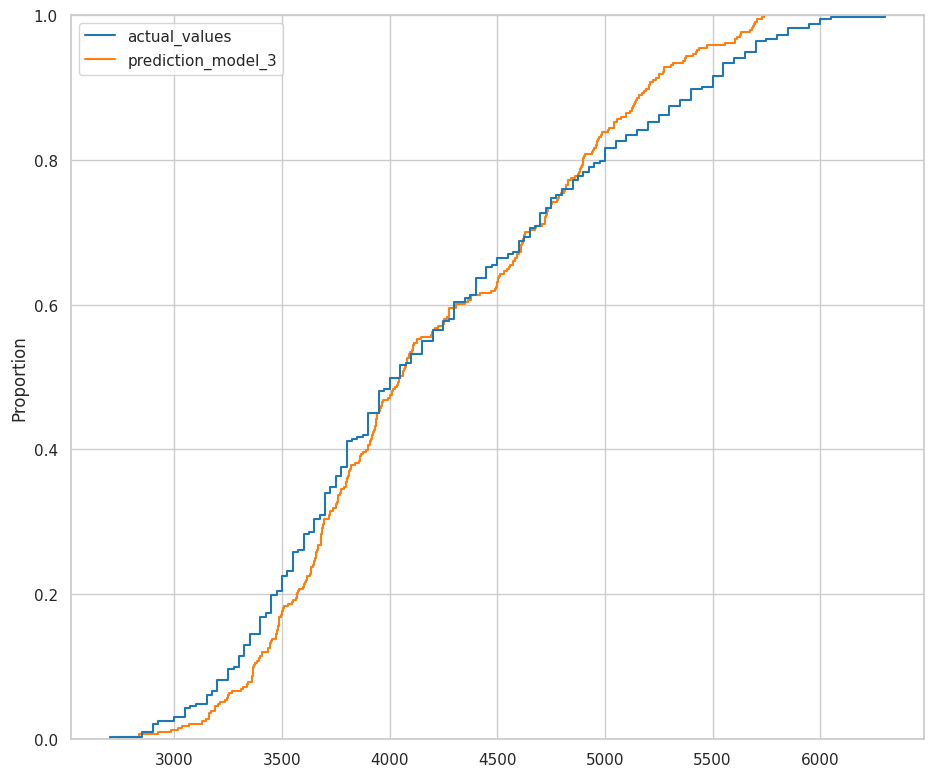

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_values','prediction_model_3'])
)
plt.show()

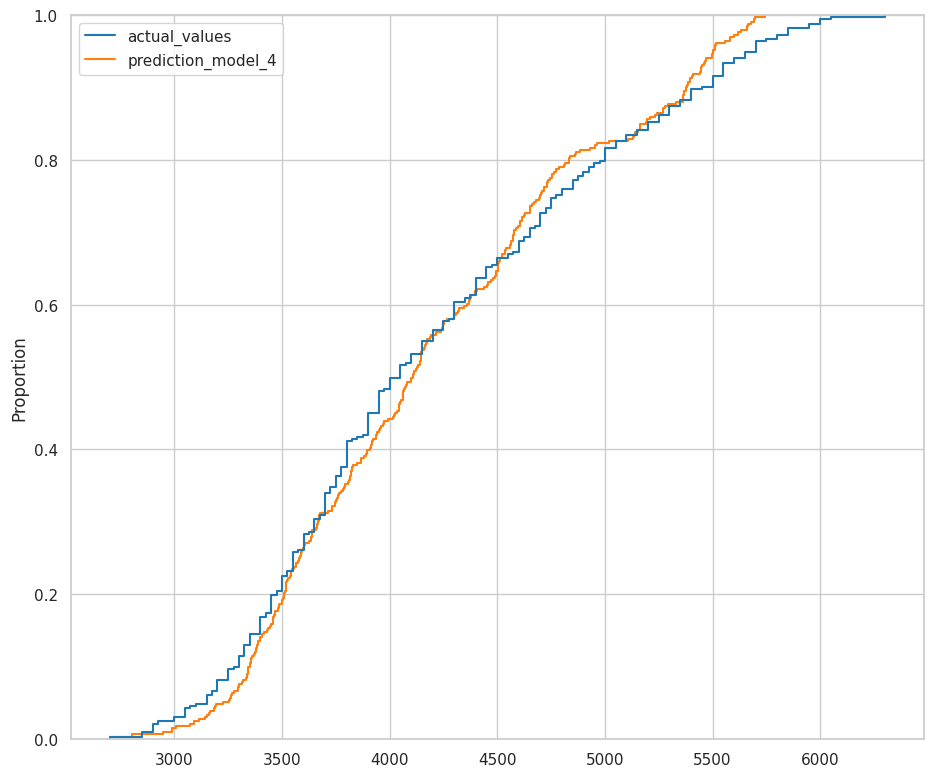

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_values','prediction_model_4'])
)
plt.show()

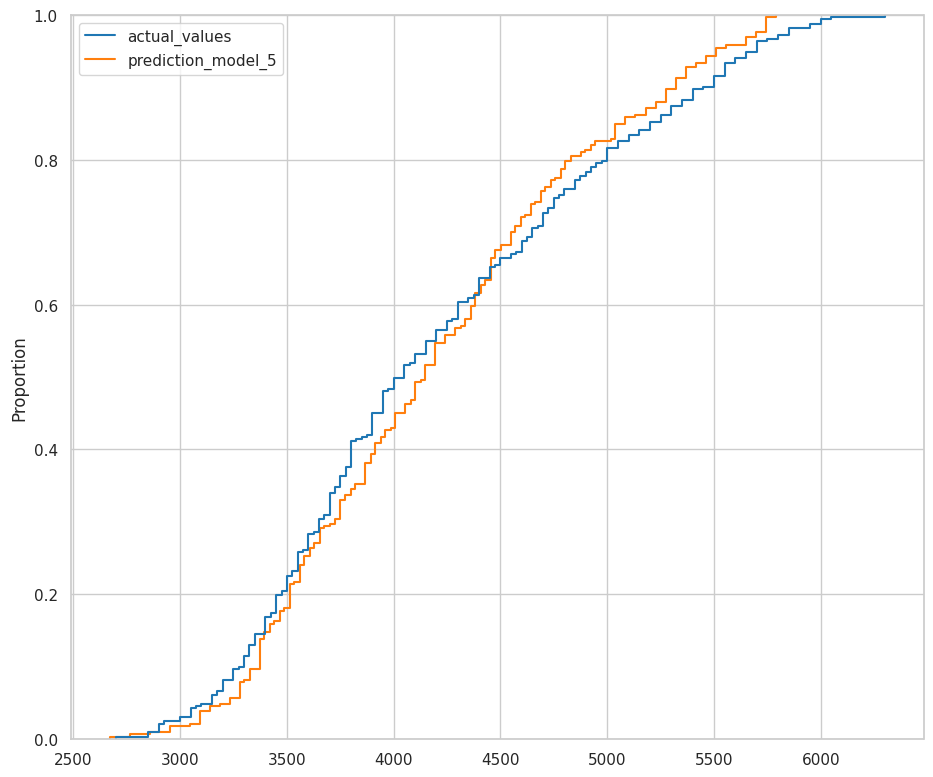

In [ ]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_values','prediction_model_5'])
)
plt.show()

#### PDFs

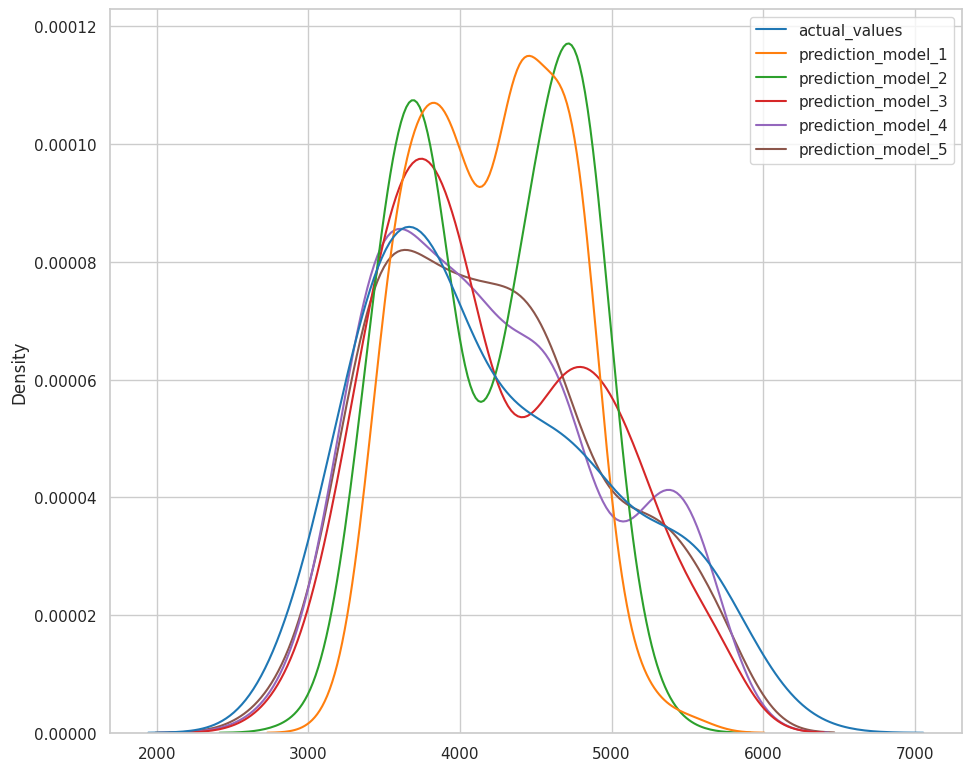

In [ ]:
sns.kdeplot(
    data=models_result
)
plt.show()

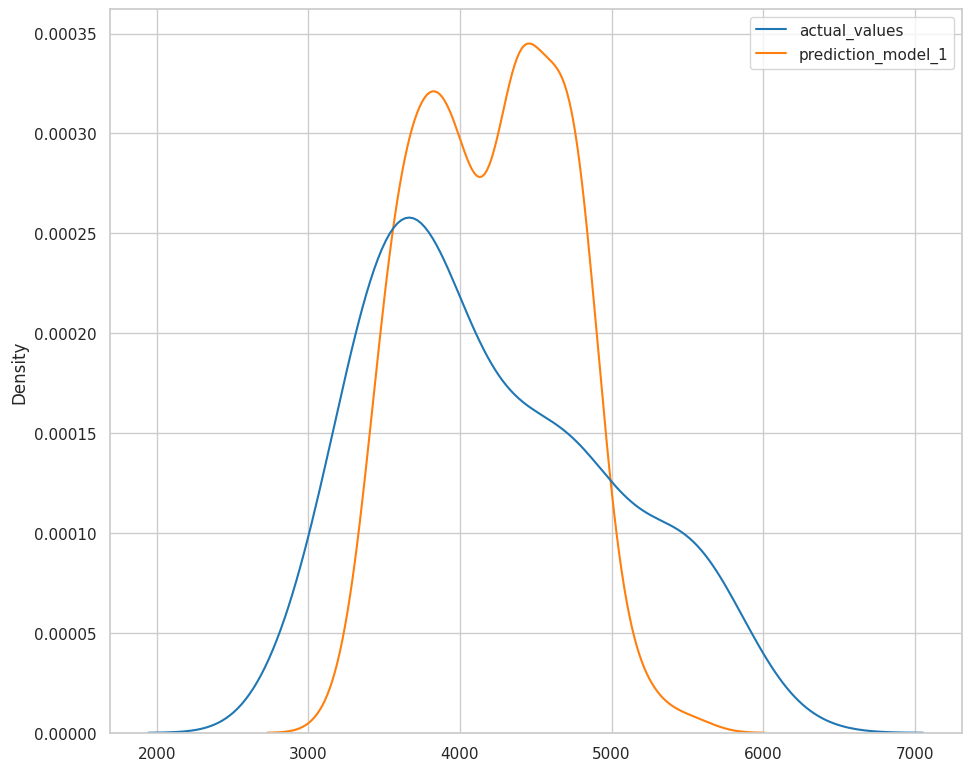

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_values','prediction_model_1'])
)
plt.show()

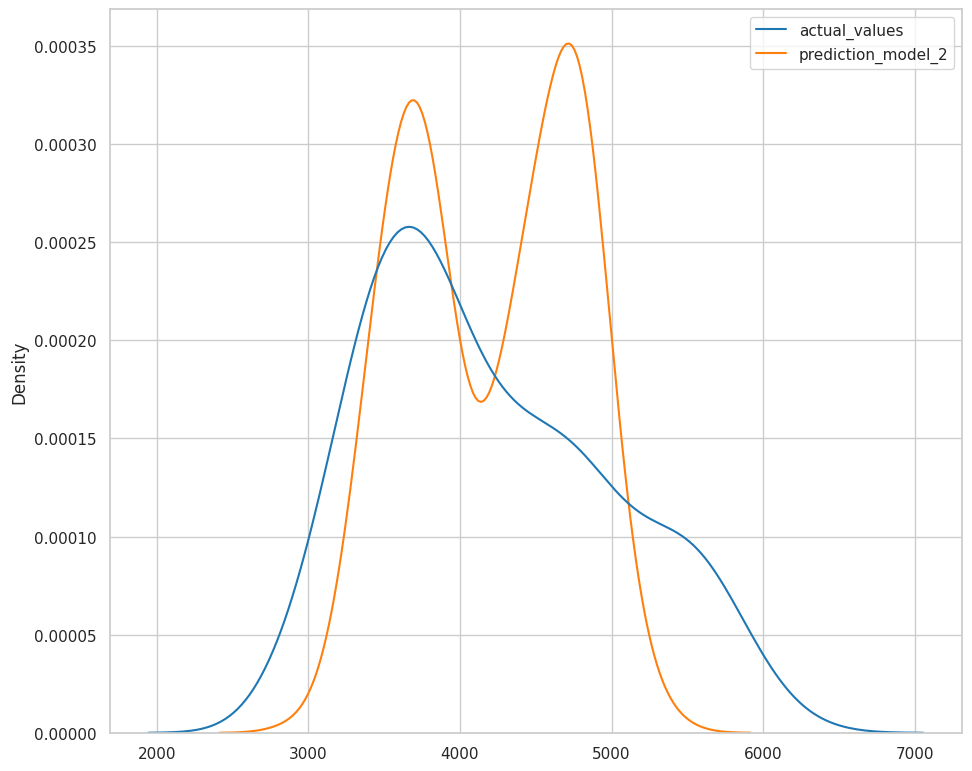

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_values','prediction_model_2'])
)
plt.show()

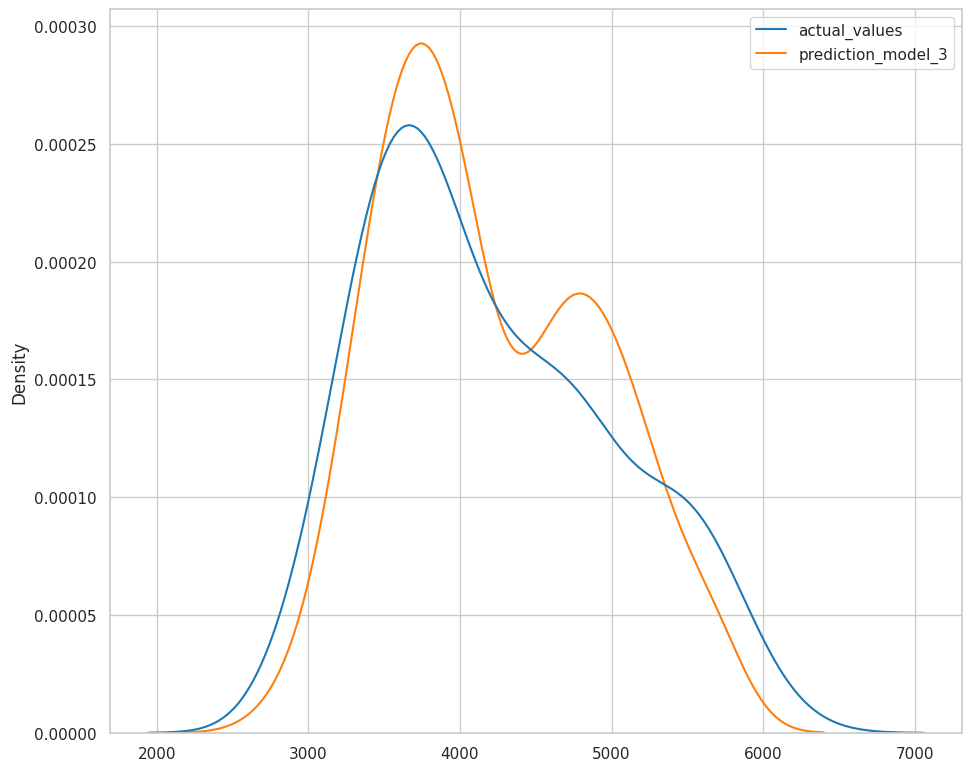

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_values','prediction_model_3'])
)
plt.show()

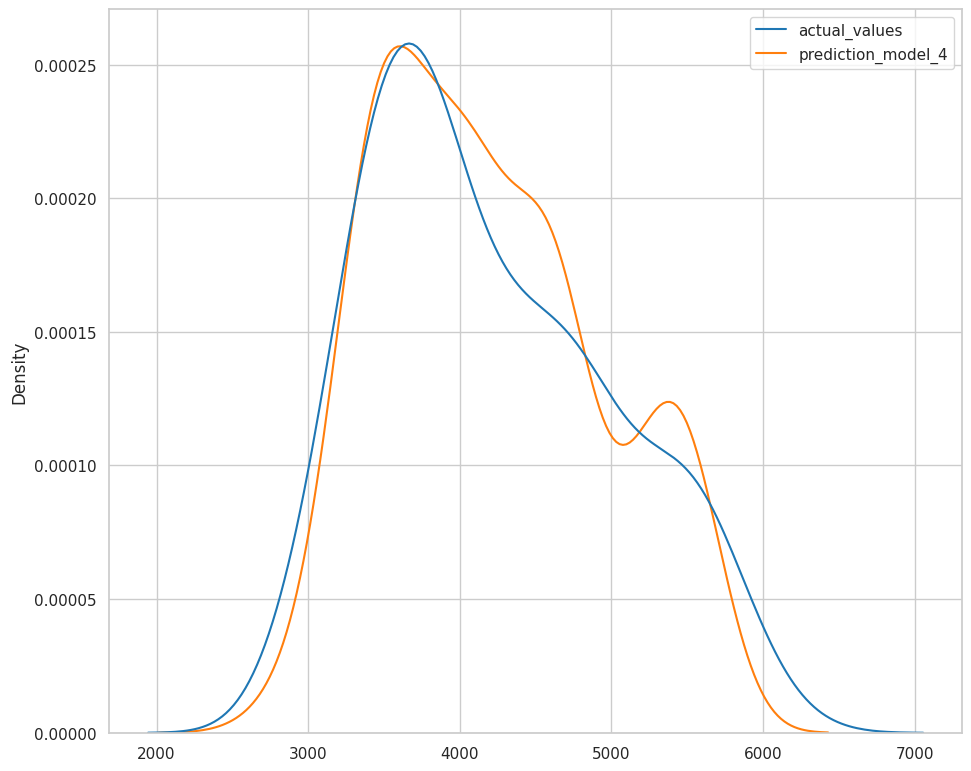

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_values','prediction_model_4'])
)
plt.show()

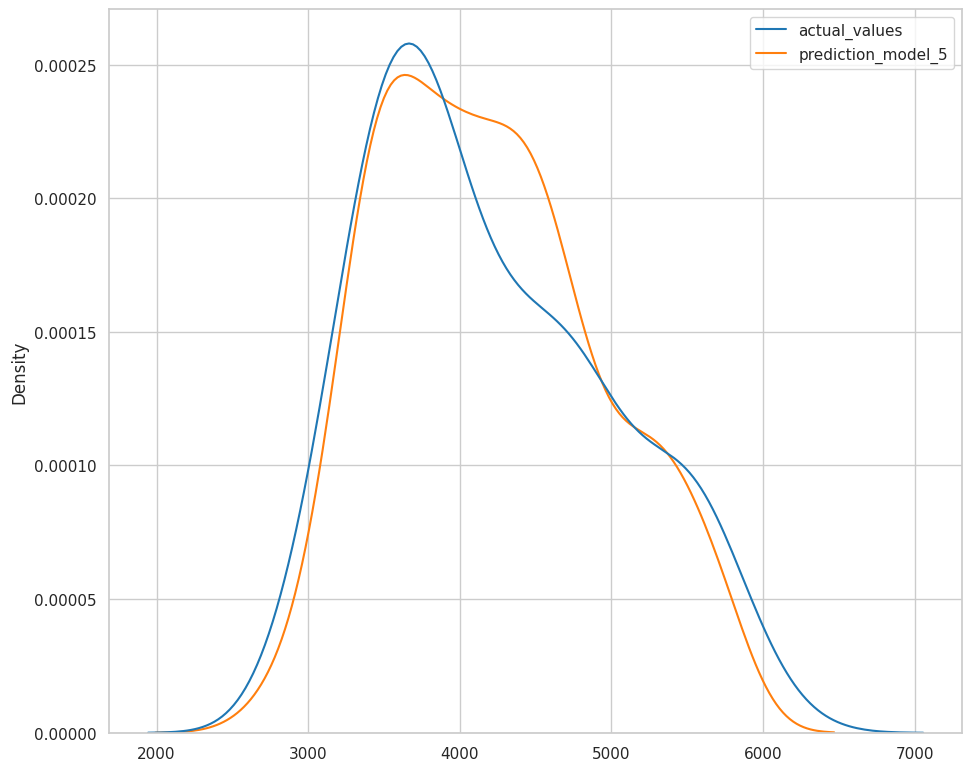

In [ ]:
sns.kdeplot(
    data=models_result.select_columns(['actual_values','prediction_model_5'])
)
plt.show()

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

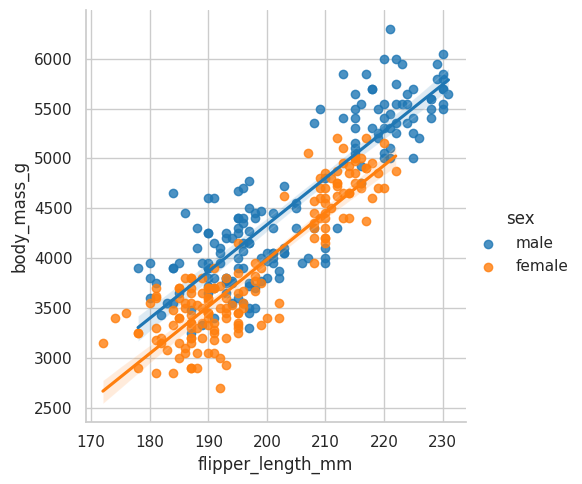

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex'
)
plt.show()

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

coef positivos traduce a probabilidades más altas que se den y negativas menos probables.

Los resultados se interpretan asi:

- A mayor longitud de las aletas, mas probable que el pinguino sea macho (0.1393).
- A mayor longitud de los picos, mas probable que el pinguino sea macho (0.1413).
Mientras mas ancho el pico, mas probable que sea macho (1.6401)
- Es menos probable que hayan machos en la isla Dream respecto a la Biscoe (-1.55)
- Es menos probable que hayan machos en la isla Torgensen respecto a la Biscoe (-1.03)


El parametro P>|z| indica cuales son las variables más significativas estadísticamente respecto al resultado. Entre más cercano a cero, más significativo es. 

In [ ]:
smf.logit(
    formula='numeric_sex~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.4793
Time:                        17:50:15   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [ ]:
# Probabilidad de que un pingüino sea macho en la isla Torgersen respecto a la isla Dream
-1.559-(-1.0323)

-0.5267

## Exploración de nuestras variables categóricas

In [ ]:
(
    processed_penguins_df
    .value_counts(['island','sex'])
    .reset_index(name='counts')
)

island     sex  counts
0     Biscoe    male      83
1     Biscoe  female      80
2      Dream    male      62
3      Dream  female      61
4  Torgersen  female      24
5  Torgersen    male      23

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [ ]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        is_adelie=lambda df:df.species.replace(['Adelie','Gentoo','Chinstrap'],[1,0,0])
    )
)
processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  numeric_sex  is_adelie  
0         3750.0    male  2007            1          1  
1         3800.0  female  2007            0          1  
2         3250.0  female  2007            0          1  
4         3450.0  female  2007            0          1  
5         3650.0    male  2007            1          1  
..           ...     ...   ...          ...        ...  
339       4000.0    male  2009            1          0  
340       3400.0  female  2009            0          0  
341       3775.0    male  2009            1          0  
342       4100.0    male  2009            1          0  
343       3775.0  female  2009            0          0  

[333 rows x 10 columns]

In [ ]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + body_mass_g + C(sex)',
    data=processed_penguins_df
).fit()

Optimization terminated successfully.
         Current function value: 0.355076
         Iterations 8


In [ ]:
model_is_adelie.params

Intercept            41.203197
C(sex)[T.male]        1.228740
flipper_length_mm    -0.215714
body_mass_g           0.000148
dtype: float64

In [ ]:
is_adelie_df_predict = pd.DataFrame(
    dict(
        is_adelie= processed_penguins_df.is_adelie,
        is_adelie_predict= model_is_adelie.predict().round()
    )
)
is_adelie_df_predict

is_adelie  is_adelie_predict
0            1                1.0
1            1                1.0
2            1                0.0
4            1                1.0
5            1                1.0
..         ...                ...
339          0                0.0
340          0                0.0
341          0                1.0
342          0                0.0
343          0                0.0

[333 rows x 2 columns]

In [ ]:
(
    is_adelie_df_predict
    .value_counts(['is_adelie','is_adelie_predict'])
    .reset_index(name='counts')
)

is_adelie  is_adelie_predict  counts
0          0                0.0     151
1          1                1.0     129
2          0                1.0      36
3          1                0.0      17

## Visualización con sklearn de la comparación real vs predicción y su exactitud

In [ ]:
print(sklearn.metrics.confusion_matrix( is_adelie_df_predict.is_adelie, is_adelie_df_predict.is_adelie_predict ),
sklearn.metrics.accuracy_score(is_adelie_df_predict.is_adelie,is_adelie_df_predict.is_adelie_predict))



[[151  36]
 [ 17 129]] 0.8408408408408409


# Paradoja de Simpson

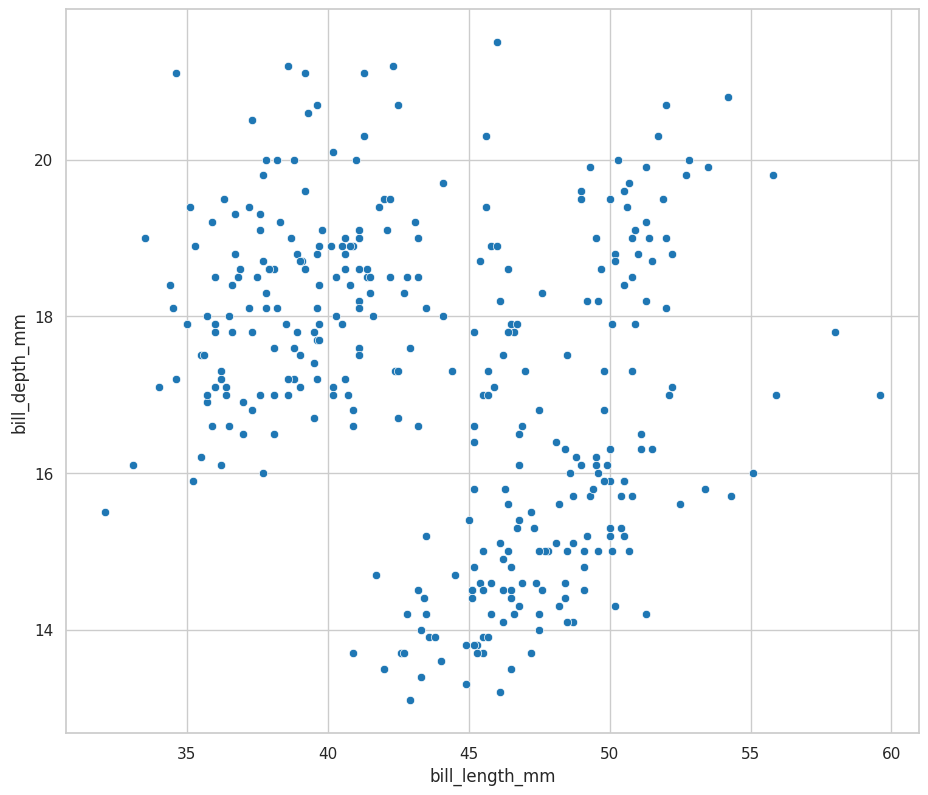

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
plt.show()

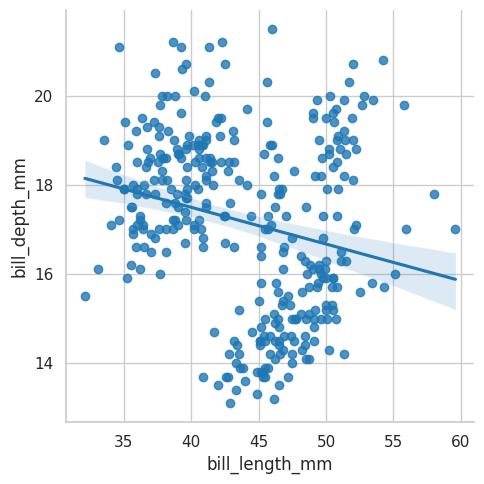

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
plt.show()

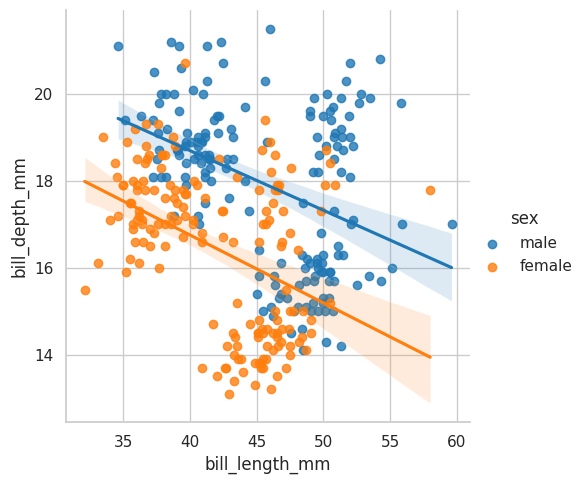

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='sex'
)
plt.show()

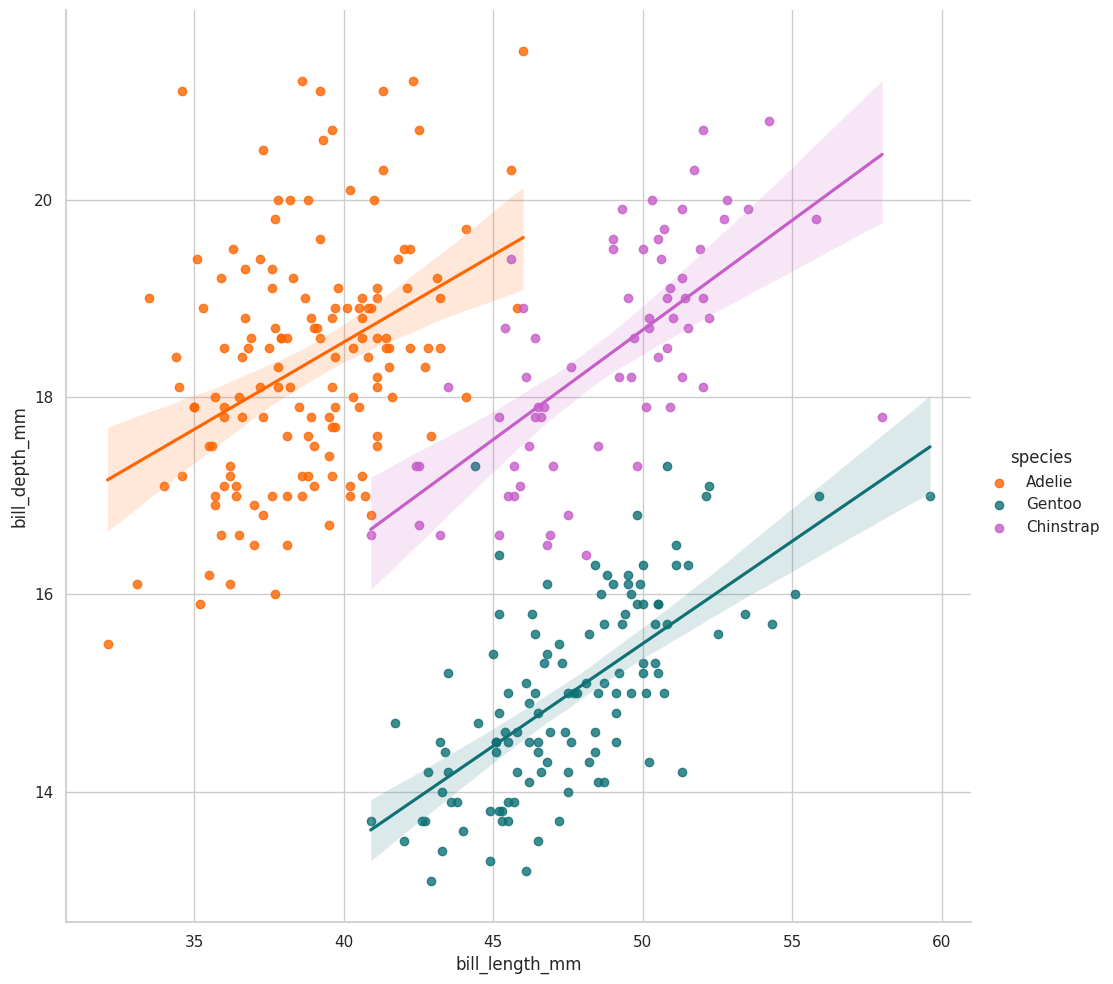

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color,
    height=10
)
plt.show()

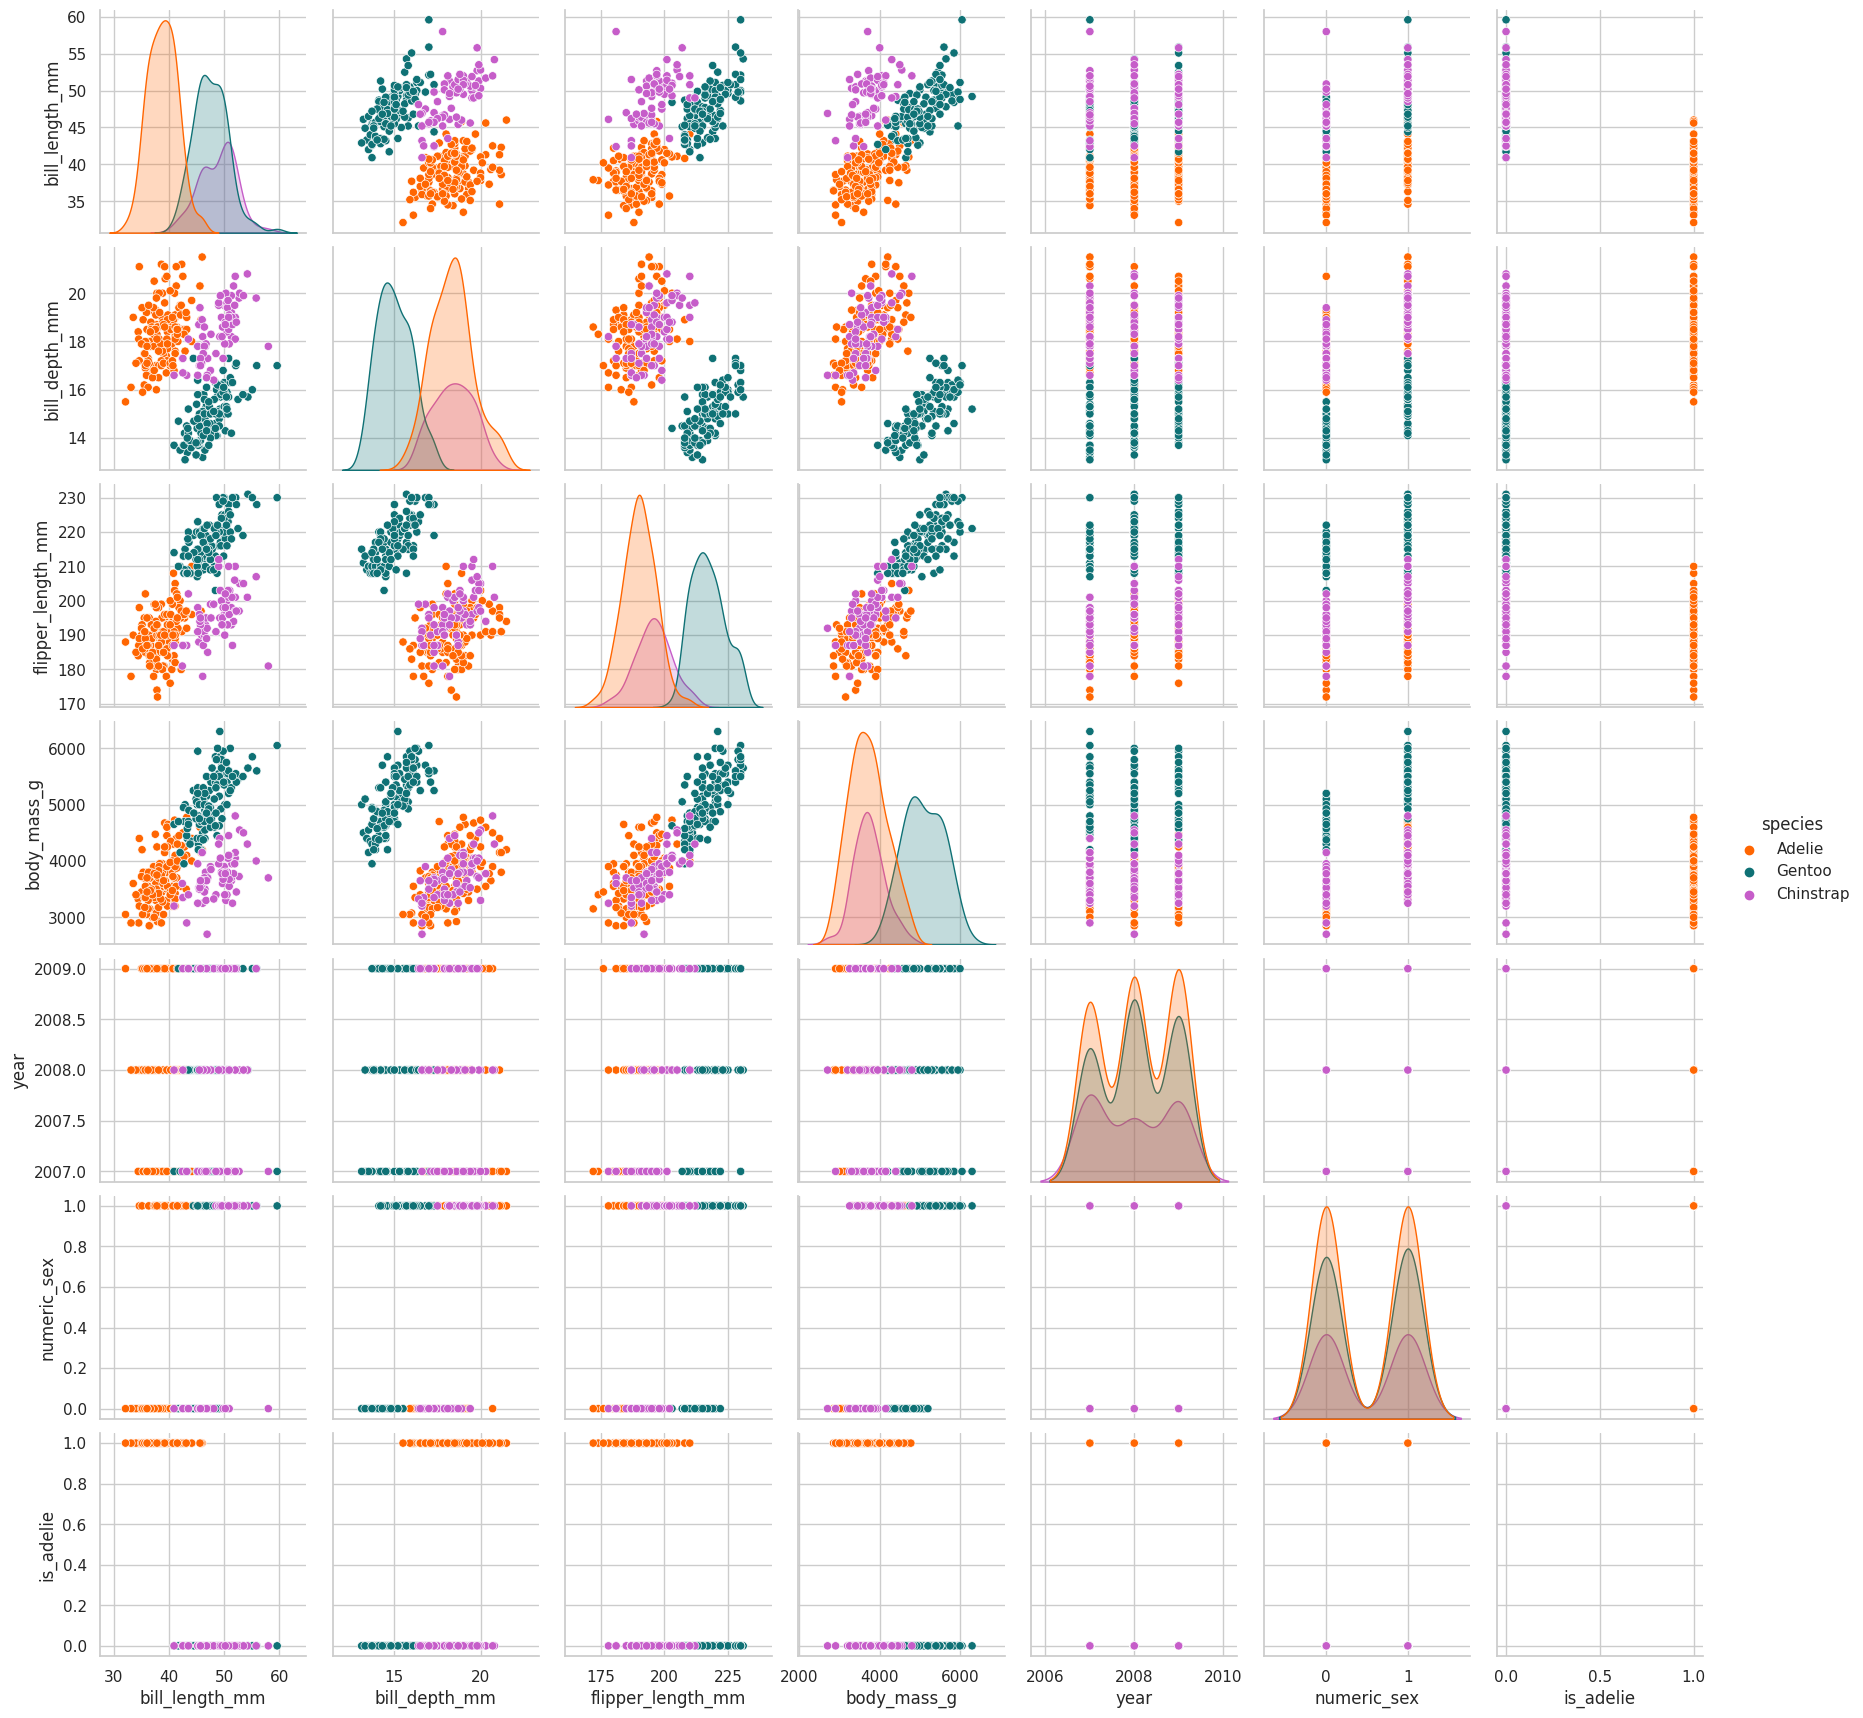

In [ ]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species',
    palette=penguin_color
)
plt.show()

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5735d9b-e89b-416e-b48b-df3114c25516' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>